In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'CatBoost-FS-767cases-1921-2023.ipynb', 'catboost_info', 'EGFR_subtypes_prediction_134cases_1921_newKNN19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newKNN191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB17.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB171.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF11.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF111.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-25.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-251.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM12.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM121.ipyn

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'NB17'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-NB17.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-NB17.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [4]:
test.shape

(29, 18)

In [5]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-NB17.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_wavelet-LHH_glcm_ClusterShade                      104 non-null    float64
 1   CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized  104 non-null    float64
 2   CT_original_shape_Sphericity                          104 non-null    float64
 3   CT_wavelet2-HLL_firstorder_Mean                       104 non-null    float64
 4   CT_original_glcm_Autocorrelation                      104 non-null    float64
 5   CT_original_glcm_Imc1                                 104 non-null    float64
 6   CT_lbp-3D-k_glcm_ClusterShade                         104 non-null    float64
 7   CT_original_glcm_Contrast                             104 non-null    float64
 8   CT_lbp-3D-m1_glrlm_ShortRunEmphasis                   104 no

count   mean   std  \
CT_wavelet-LHH_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... 104.000 -0.000 1.005   
CT_original_shape_Sphericity                       104.000  0.000 1.005   
CT_wavelet2-HLL_firstorder_Mean                    104.000 -0.000 1.005   
CT_original_glcm_Autocorrelation                   104.000  0.000 1.005   
CT_original_glcm_Imc1                              104.000 -0.000 1.005   
CT_lbp-3D-k_glcm_ClusterShade                      104.000  0.000 1.005   
CT_original_glcm_Contrast                          104.000  0.000 1.005   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                104.000 -0.000 1.005   
CT_lbp-3D-k_firstorder_90Percentile                104.000 -0.000 1.005   
CT_wavelet-HHL_glcm_Correlation                    104.000  0.000 1.005   
CT_wavelet2-LHH_firstorder_Mean                    104.000  0.000 1.005   
CT_original_firstorder_90Percentile                104.000  0.000 1.005   
CT_wavelet-LHH_firstorder_Maximum                  104.000  0.000 1.005   
CT_wavelet-HLH_glcm_Imc1                           104.000 -0.000 1.005   
CT_original_shape_SurfaceVolumeRatio               104.000 -0.000 1.005   
CT_wavelet2-HHH_glcm_ClusterShade                  104.000  0.000 1.005   
label                                              104.000  0.490 0.502   

                                                      min    10%    25%  \
CT_wavelet-LHH_glcm_ClusterShade                   -2.986 -0.674 -0.092   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... -1.584 -1.240 -0.945   
CT_original_shape_Sphericity                       -2.389 -1.402 -0.814   
CT_wavelet2-HLL_firstorder_Mean                    -6.803 -0.768 -0.356   
CT_original_glcm_Autocorrelation                   -2.267 -1.318 -0.680   
CT_original_glcm_Imc1                              -2.589 -1.472 -0.561   
CT_lbp-3D-k_glcm_ClusterShade                      -3.619 -1.479 -0.111   
CT_original_glcm_Contrast                          -0.666 -0.536 -0.316   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                -2.206 -1.204 -0.726   
CT_lbp-3D-k_firstorder_90Percentile                -2.020 -1.151 -0.601   
CT_wavelet-HHL_glcm_Correlation                    -3.633 -0.923 -0.505   
CT_wavelet2-LHH_firstorder_Mean                    -2.348 -1.135 -0.412   
CT_original_firstorder_90Percentile                -5.552 -0.761  0.094   
CT_wavelet-LHH_firstorder_Maximum                  -1.563 -1.171 -0.833   
CT_wavelet-HLH_glcm_Imc1                           -3.527 -1.309 -0.564   
CT_original_shape_SurfaceVolumeRatio               -1.543 -1.236 -0.873   
CT_wavelet2-HHH_glcm_ClusterShade                  -3.237 -0.697 -0.272   
label                                               0.000  0.000  0.000   

                                                      50%   75%   90%   95%  \
CT_wavelet-LHH_glcm_ClusterShade                    0.049 0.173 0.418 0.660   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... -0.086 0.868 1.344 1.518   
CT_original_shape_Sphericity                        0.119 0.768 1.259 1.517   
CT_wavelet2-HLL_firstorder_Mean                     0.039 0.314 0.861 1.322   
CT_original_glcm_Autocorrelation                    0.016 0.835 1.311 1.466   
CT_original_glcm_Imc1                               0.144 0.700 1.279 1.446   
CT_lbp-3D-k_glcm_ClusterShade                       0.274 0.620 0.905 1.100   
CT_original_glcm_Contrast                          -0.128 0.144 0.374 0.566   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                -0.124 0.625 1.329 1.530   
CT_lbp-3D-k_firstorder_90Percentile                -0.158 0.371 1.389 1.998   
CT_wavelet-HHL_glcm_Correlation                    -0.140 0.378 1.059 1.611   
CT_wavelet2-LHH_firstorder_Mean                    -0.019 0.244 0.528 1.177   
CT_original_firstorder_90Percentile                 0.220 0.440 0.620 0.719   
CT_wavelet-LHH_firstorder_Maximum                  -0.093 0.629 1.413 1.621   
CT_wavelet-HLH_g

In [8]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LHH_glcm_ClusterShade                        0
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized    0
CT_wavelet2-HHH_glcm_ClusterShade                       0
CT_original_shape_SurfaceVolumeRatio                    0
CT_wavelet-HLH_glcm_Imc1                                0
CT_wavelet-LHH_firstorder_Maximum                       0
CT_original_firstorder_90Percentile                     0
CT_wavelet2-LHH_firstorder_Mean                         0
CT_wavelet-HHL_glcm_Correlation                         0
CT_lbp-3D-k_firstorder_90Percentile                     0
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                     0
CT_original_glcm_Contrast                               0
CT_lbp-3D-k_glcm_ClusterShade                           0
CT_original_glcm_Imc1                                   0
CT_original_glcm_Autocorrelation                        0
CT_wavelet2-HLL_firstorder_Mean                         0
CT_original_shape_Sphericity                            0
label         

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.718182
Naive Bayes: 0.659091
KNN: 0.618182
SVM: 0.713636
ANN: 0.577273
CART: 0.527273
BaggedTrees: 0.622727
RF: 0.718182
AdaBoost: 0.759091
GBM: 0.618182
XGBoost: 0.709091
LightGBM: 0.718182
CatBoost: 0.718182
NGBoost: 0.663636

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.686          0.718
1          Naive Bayes           0.647          0.659
2                  KNN           0.735          0.618
3                  SVM           0.782          0.714
4                  ANN           0.976          0.577
5                 CART           1.000          0.527
6          BaggedTrees           0.988          0.623
7                   RF           1.000          0.718
8             AdaBoost           1.000          0.759
9                  GBM           1.000          0.618
10

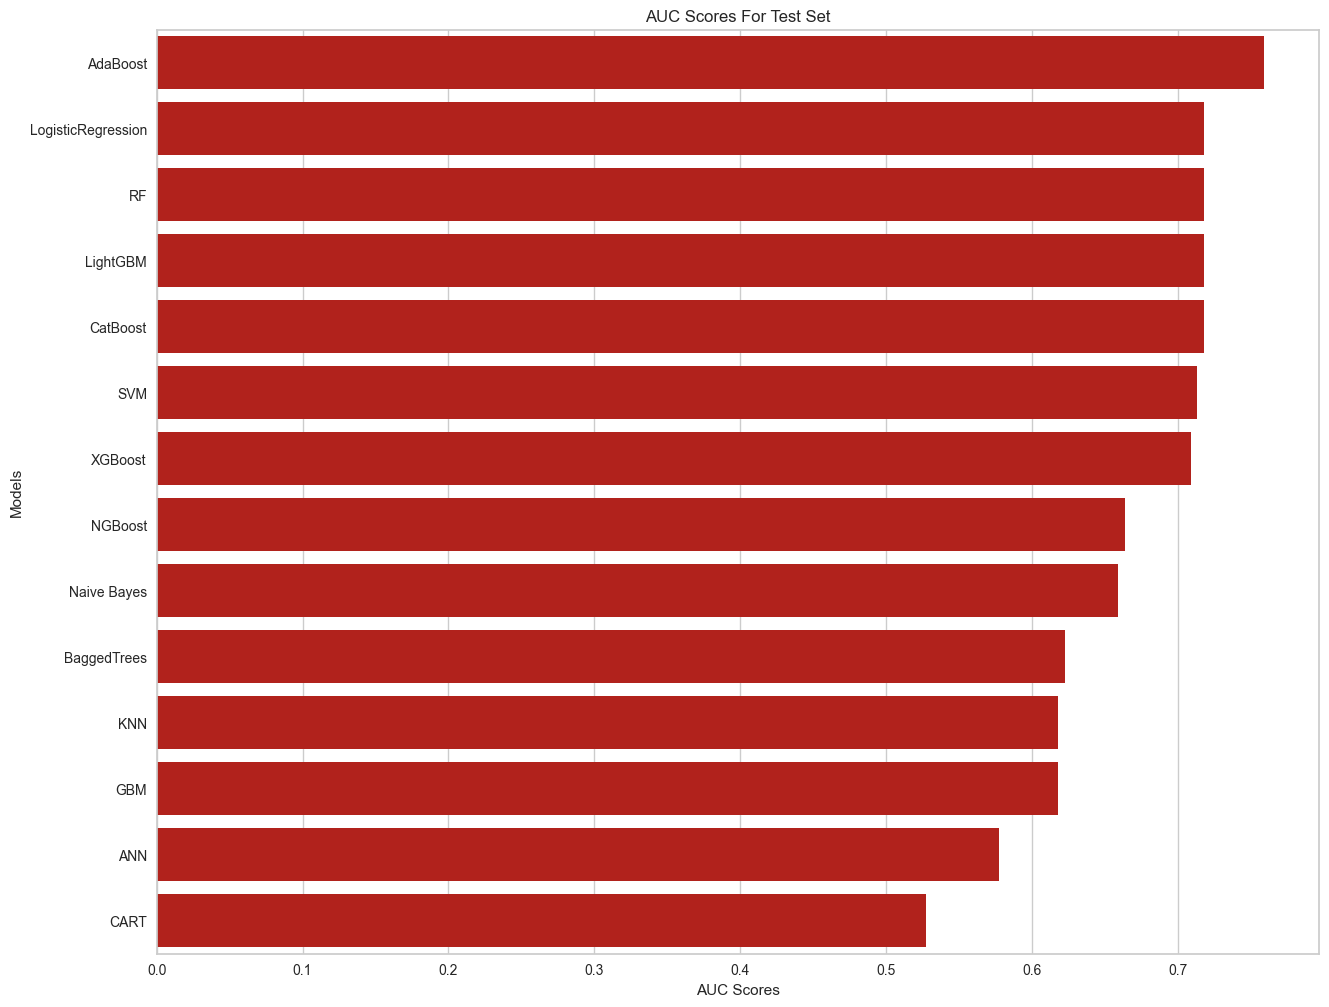

In [23]:
evaluate_classification_model_holdout(base_models)



In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [26]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.659090909090909

In [27]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-LR73', Save_format = 'csv',Save_type = 'col')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.64      0.82      0.72        11
    EGFR E21       0.71      0.50      0.59        10

    accuracy                           0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21

precision 0.7142857142857143 accuracy 0.6666666666666666 recall 0.5 auc 0.659090909090909


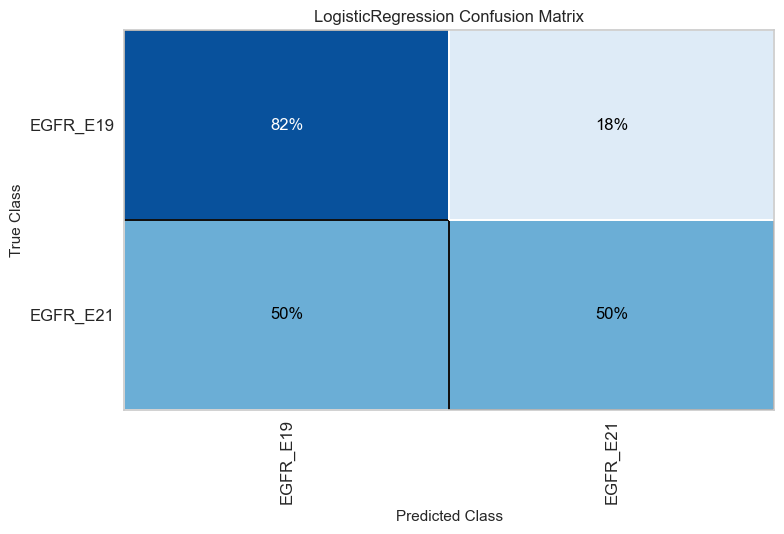

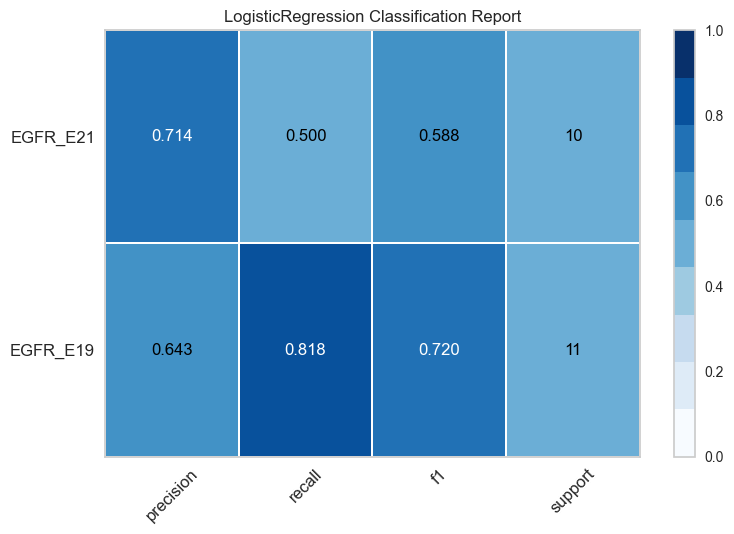

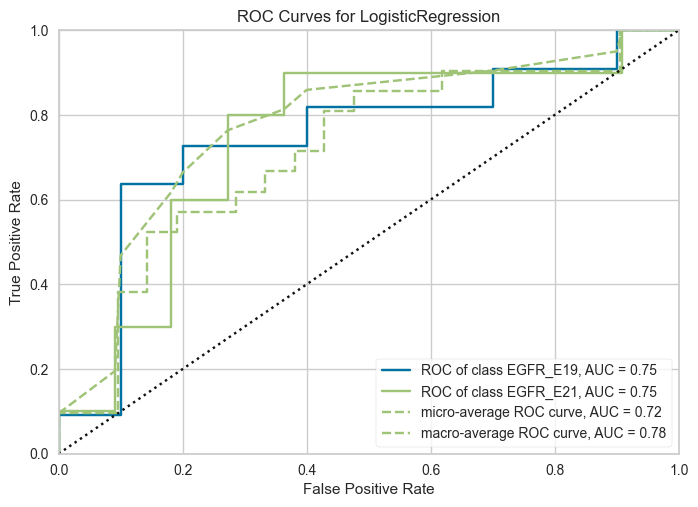

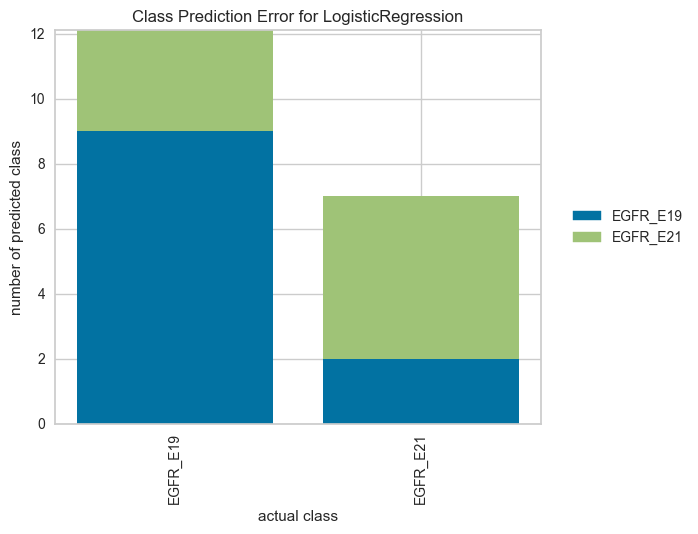

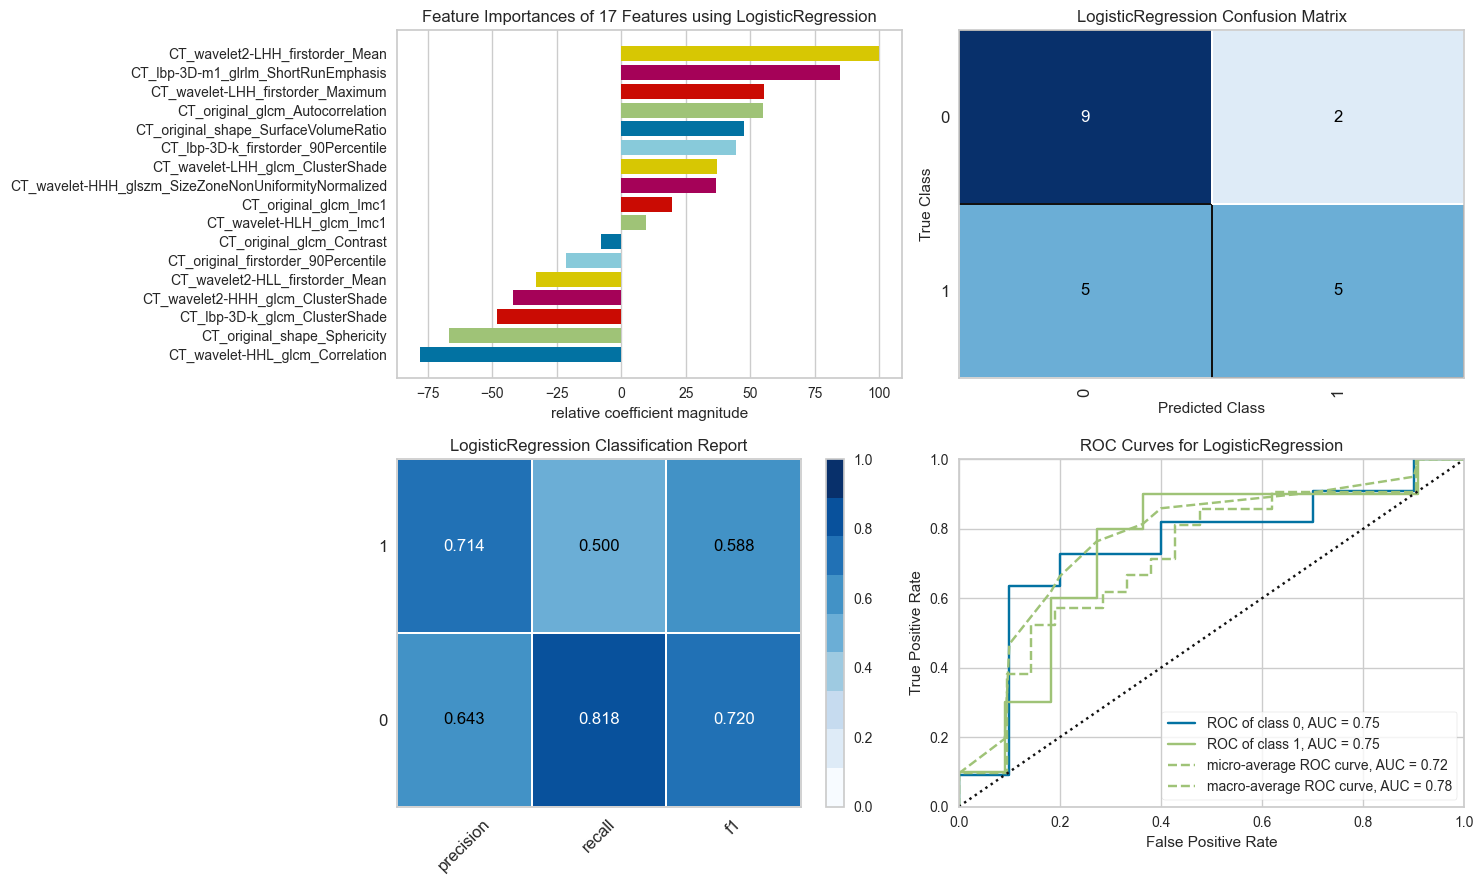

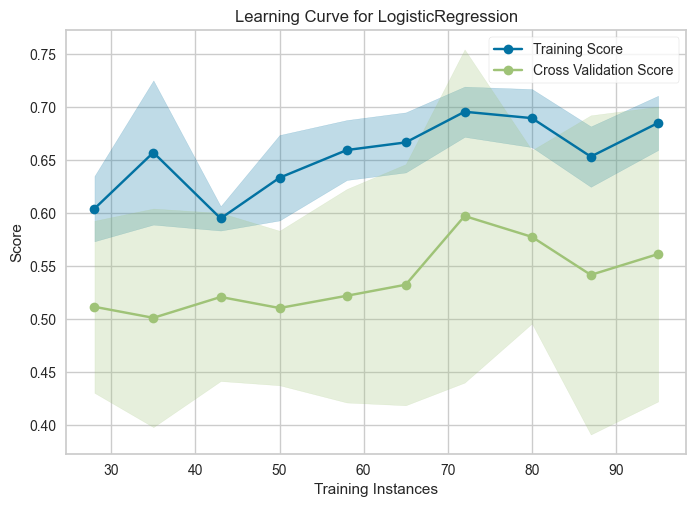

In [29]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [31]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.6636363636363637

In [32]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-RF73', Save_format = 'csv',Save_type = 'col')

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


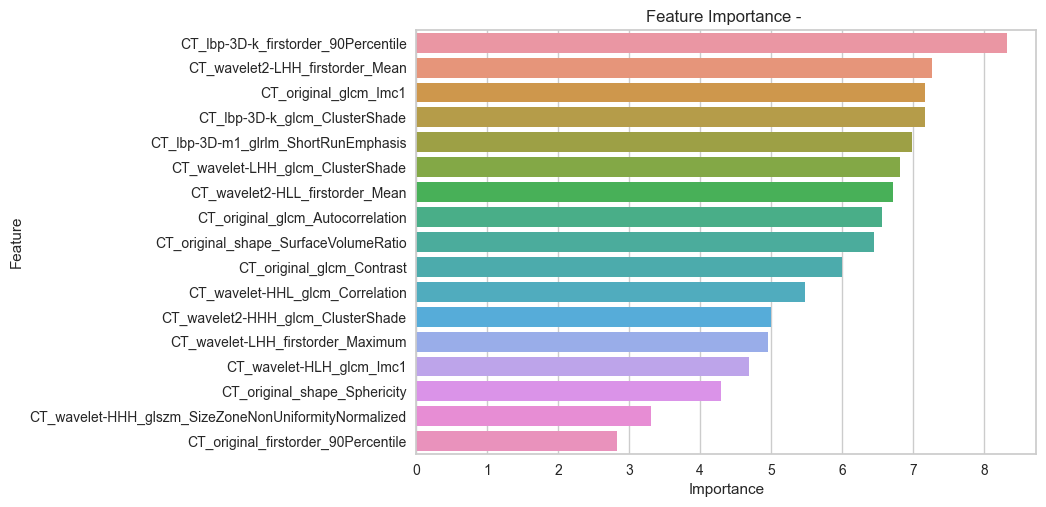

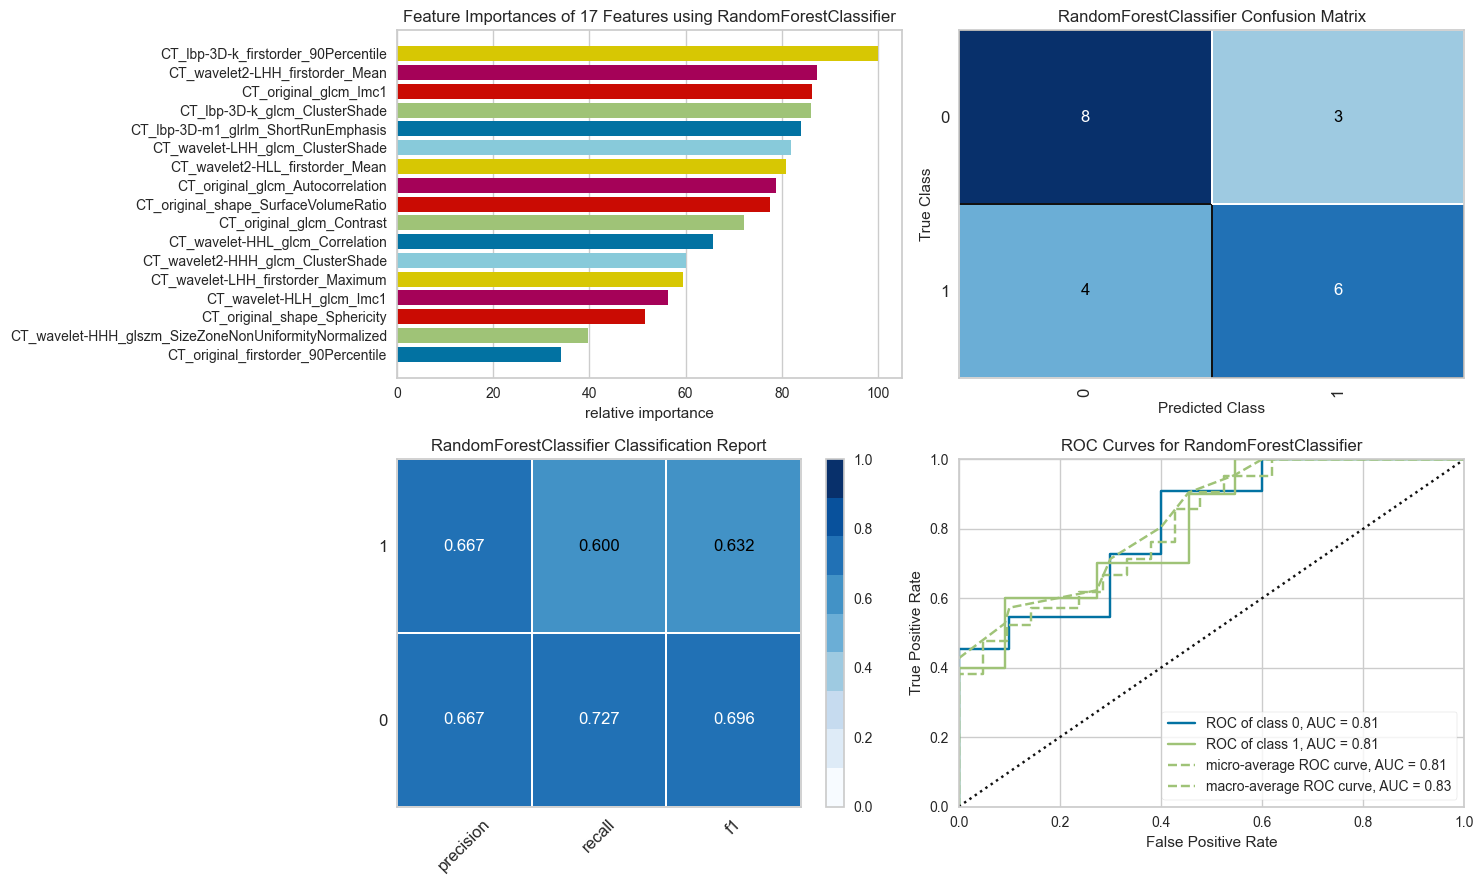

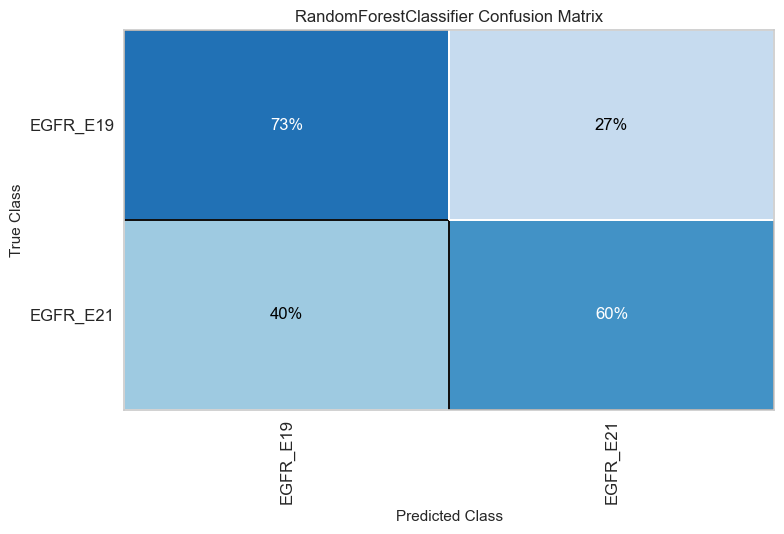

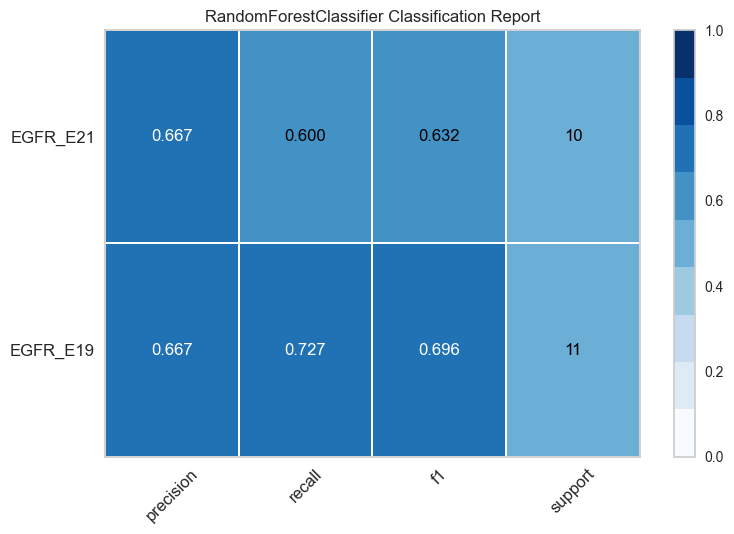

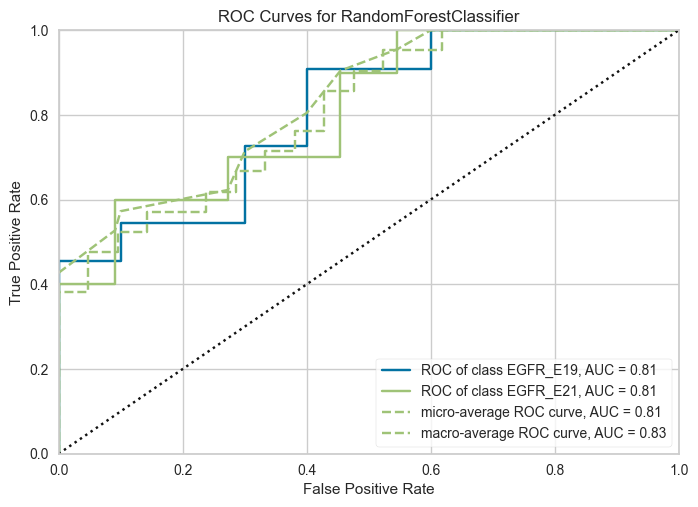

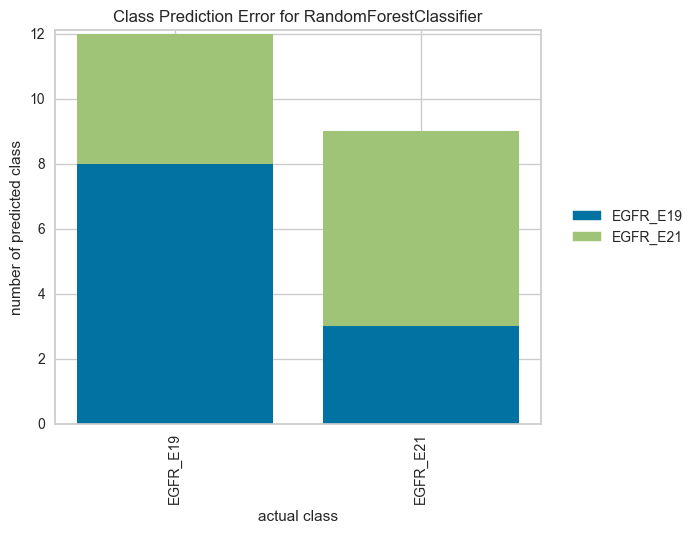

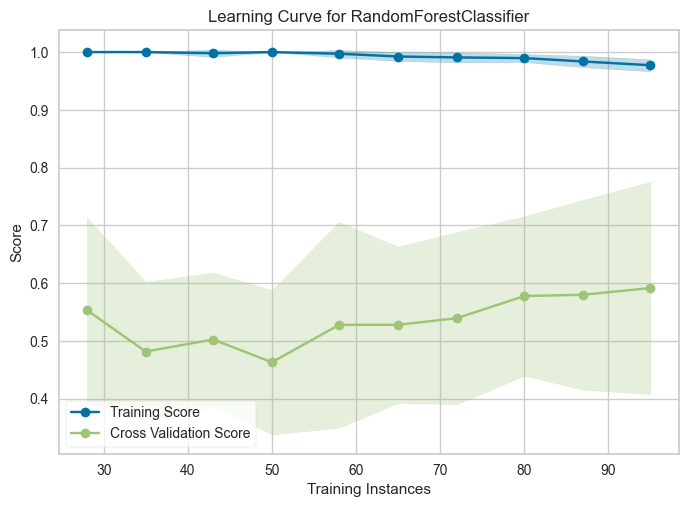

In [34]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [36]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0:	learn: 0.6463980	total: 486us	remaining: 96.9ms
1:	learn: 0.6316570	total: 1.09ms	remaining: 108ms
2:	learn: 0.6195797	total: 1.58ms	remaining: 104ms
3:	learn: 0.5938128	total: 2.08ms	remaining: 102ms
4:	learn: 0.5770856	total: 2.56ms	remaining: 99.7ms
5:	learn: 0.5484246	total: 3.09ms	remaining: 100ms
6:	learn: 0.5336102	total: 3.58ms	remaining: 98.7ms
7:	learn: 0.5264653	total: 4.07ms	remaining: 97.8ms
8:	learn: 0.5032328	total: 4.55ms	remaining: 96.6ms
9:	learn: 0.4943926	total: 5.01ms	remaining: 95.2ms
10:	learn: 0.4692291	total: 5.48ms	remaining: 94.1ms
11:	learn: 0.4570745	total: 5.95ms	remaining: 93.3ms
12:	learn: 0.4462826	total: 6.41ms	remaining: 92.3ms
13:	learn: 0.4390931	total: 6.86ms	remaining: 91.2ms
14:	learn: 0.4242641	total: 7.33ms	remaining: 90.5ms
15:	learn: 0.4199689	total: 7.79ms	remaining: 89.6ms
16:	learn: 0.4086927	total: 8.27ms	remaining: 89ms
17:	learn: 0.3903364	total: 8.72ms	remaining: 88.2ms
18:	learn: 0.3772959	total: 9.2ms	remaining: 87.6ms
19:	learn: 

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0.6666666666666666

In [37]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [38]:
# shap.dependence_plot(y_train, shap_values, X_train)

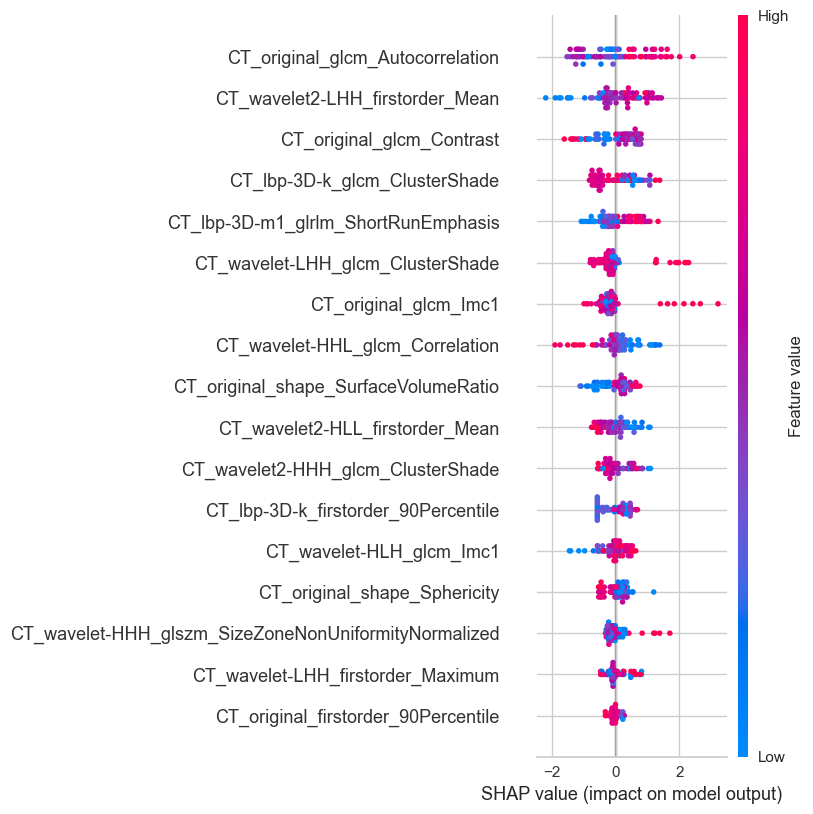

In [39]:

shap.summary_plot(shap_values, X_train)

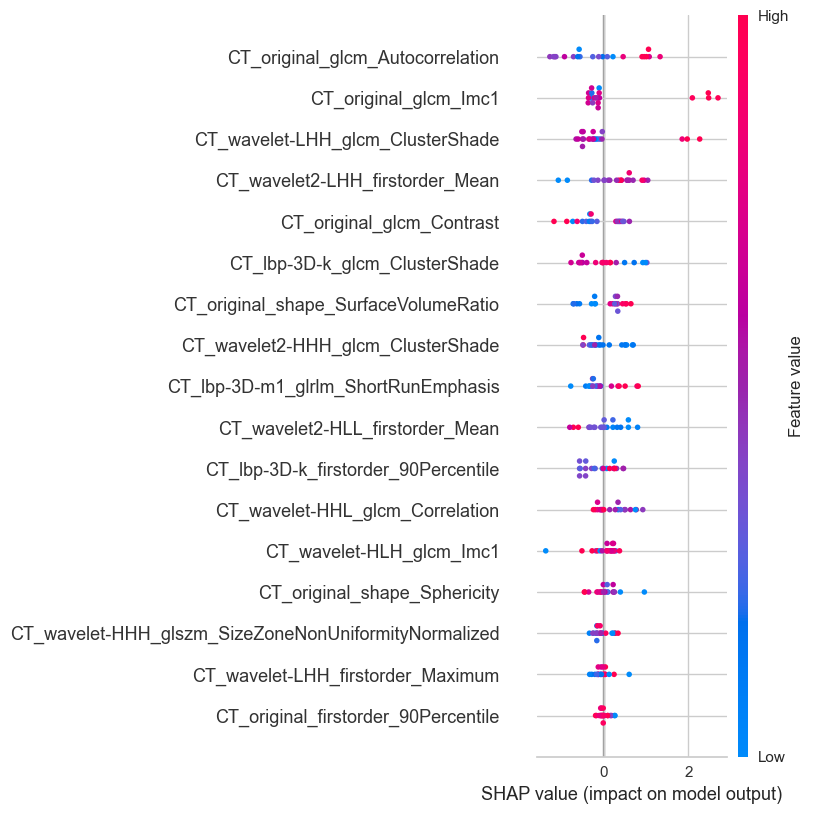

In [40]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [41]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [42]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-CBC73', Save_format = 'csv',Save_type = 'col')

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.70      0.64      0.67        11
    EGFR E21       0.64      0.70      0.67        10

    accuracy                           0.67        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.67      0.67      0.67        21

precision 0.6363636363636364 accuracy 0.6666666666666666 recall 0.7 auc 0.6681818181818182


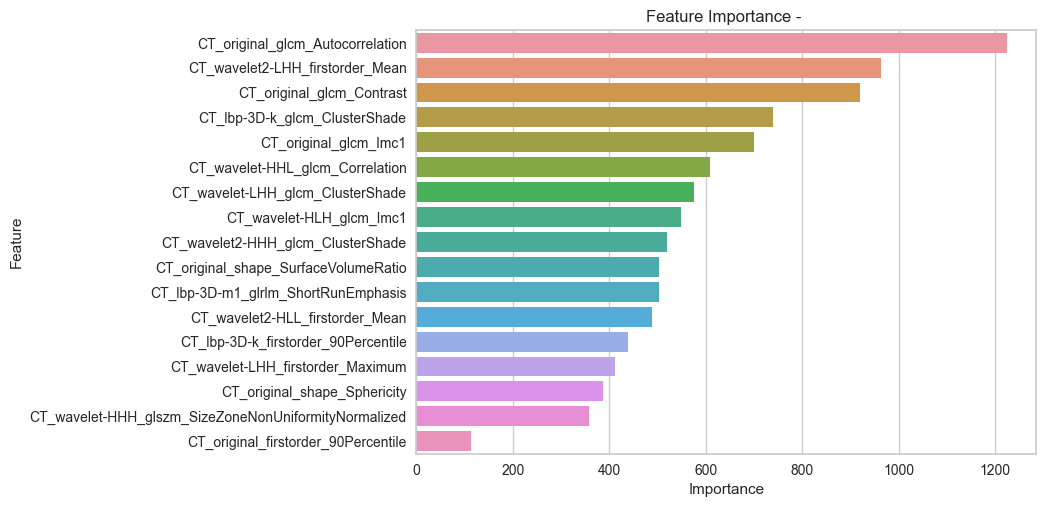

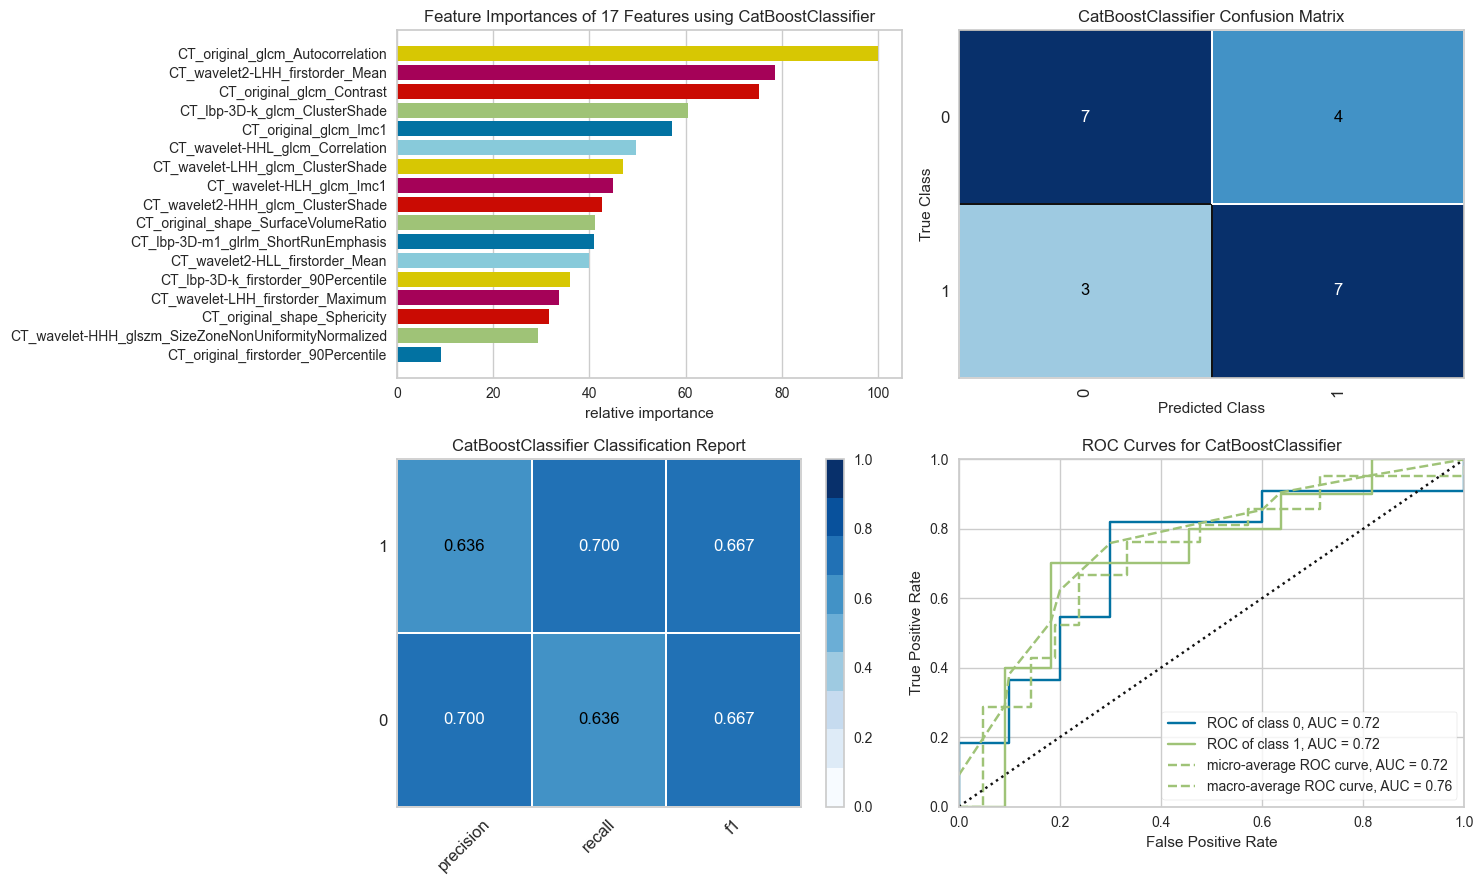

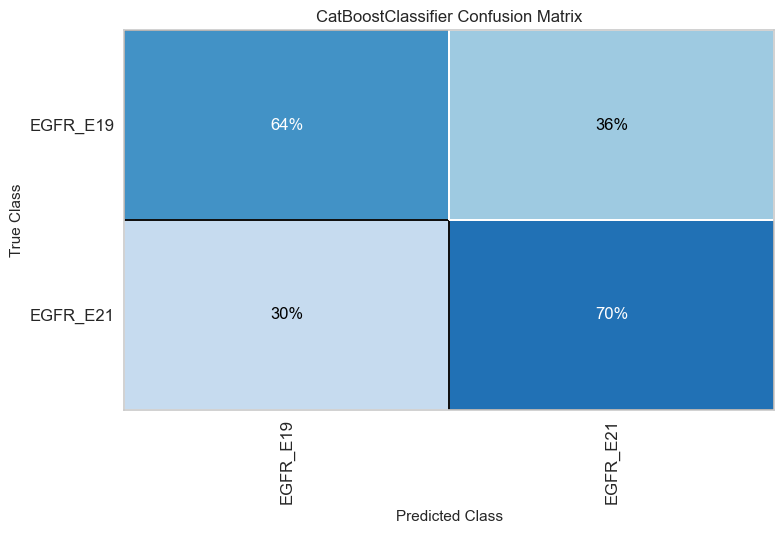

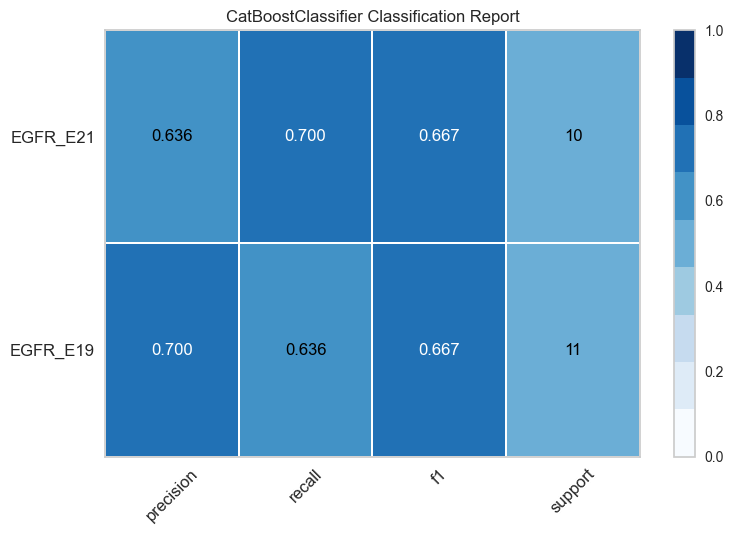

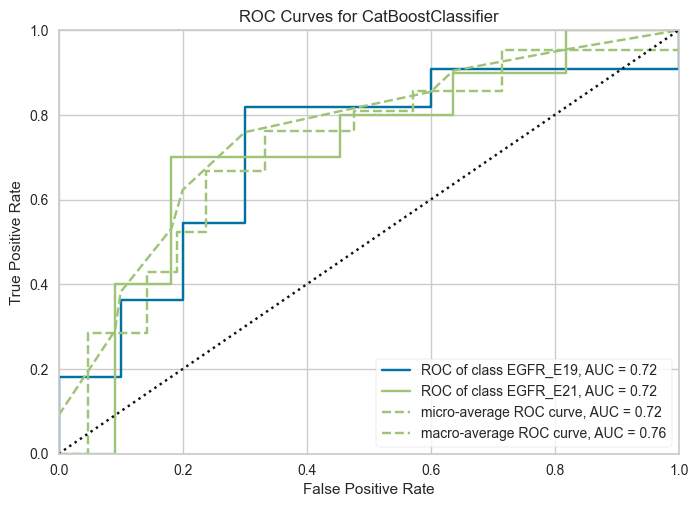

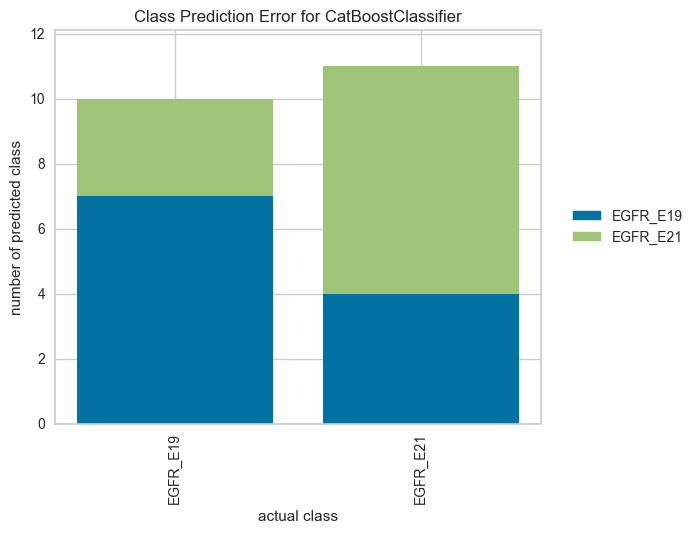

TypeError: __init__() got an unexpected keyword argument 'iterations'

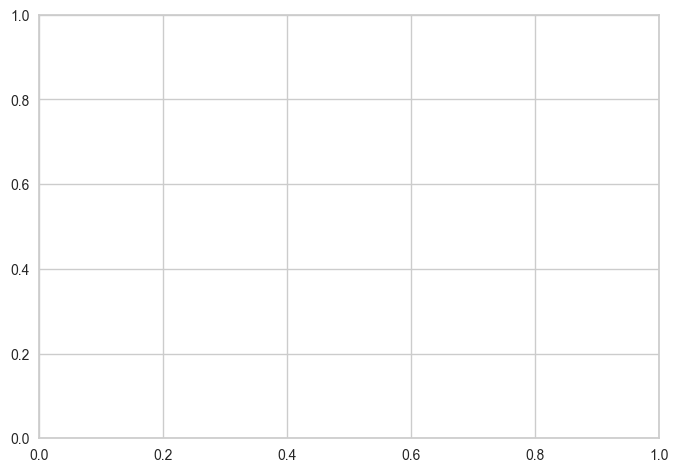

In [44]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [51]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7619047619047619

In [52]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-ADB73', Save_format = 'csv',Save_type = 'col')

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.82      0.78        11
    EGFR E21       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21

precision 0.7777777777777778 accuracy 0.7619047619047619 recall 0.7 auc 0.759090909090909


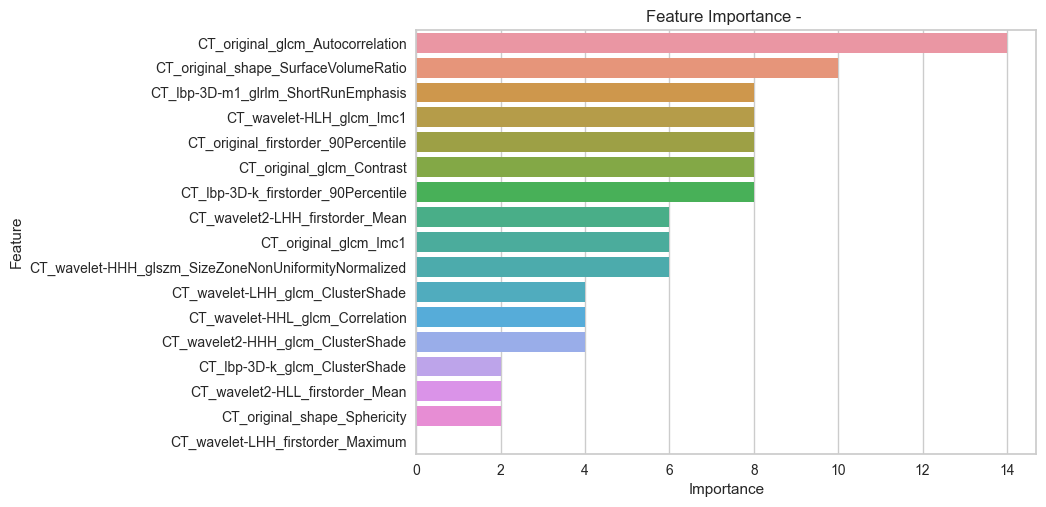

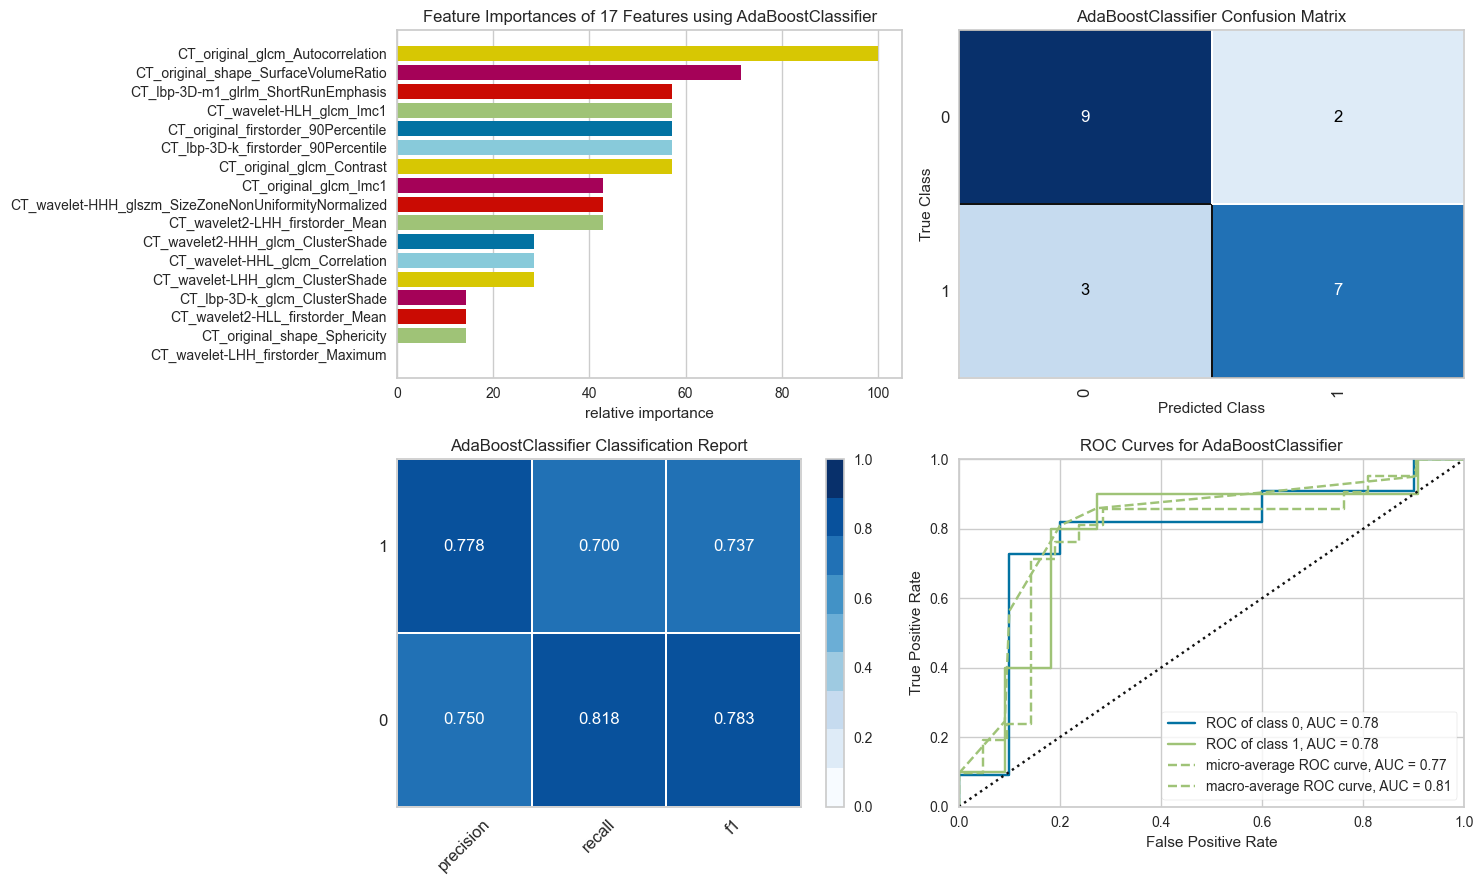

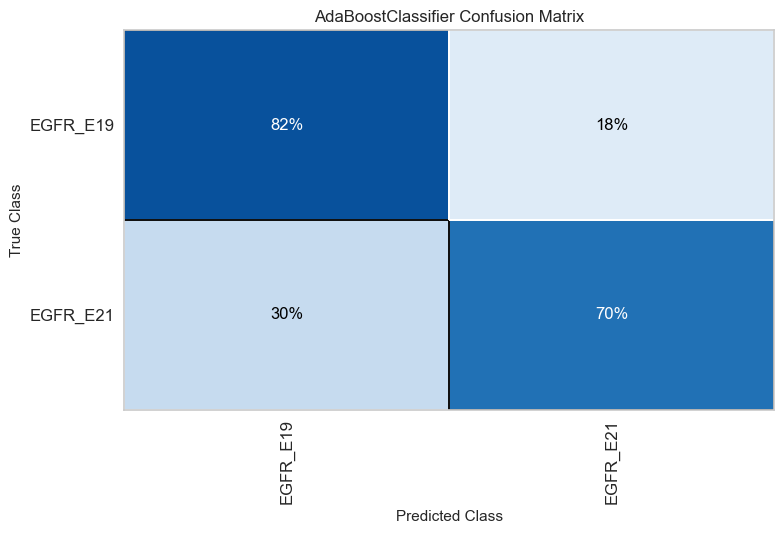

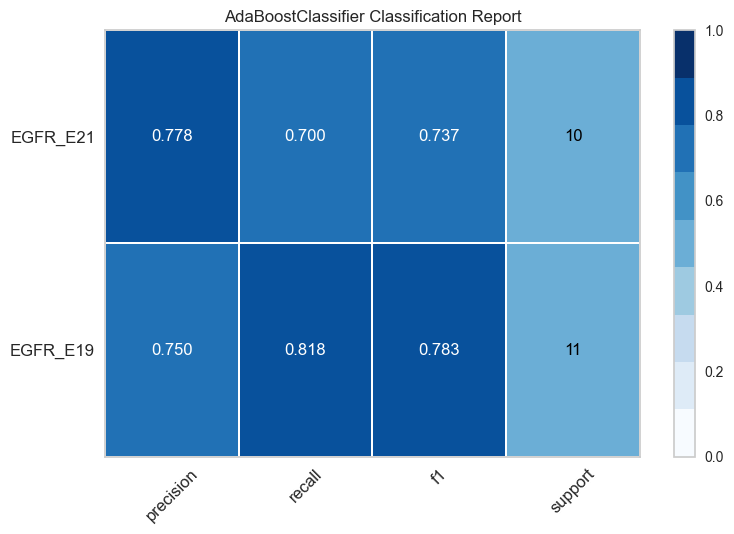

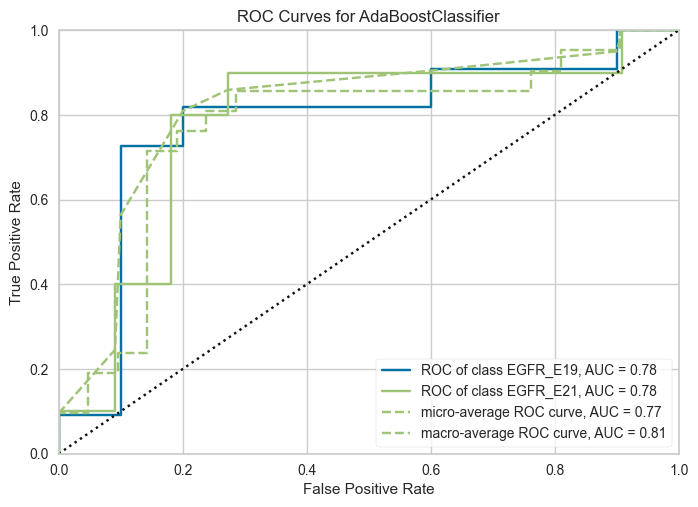

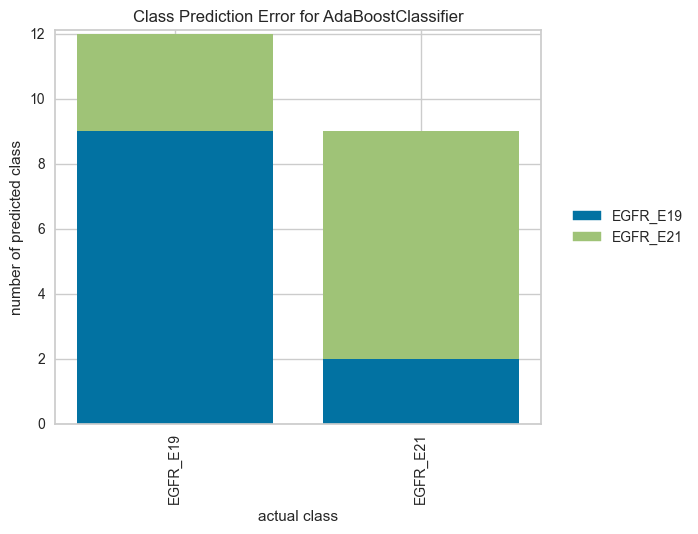

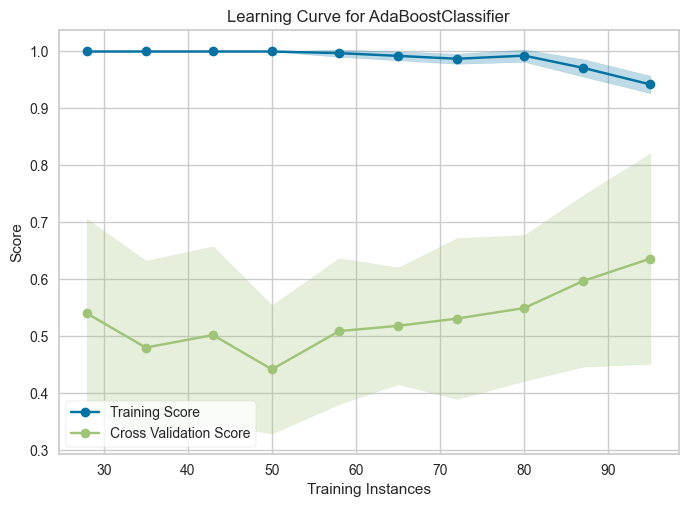

In [54]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)

report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [56]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7619047619047619

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-gbdt', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.80      0.73      0.76        11
    EGFR E21       0.73      0.80      0.76        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21

precision 0.7272727272727273 accuracy 0.7619047619047619 recall 0.8 auc 0.7636363636363637


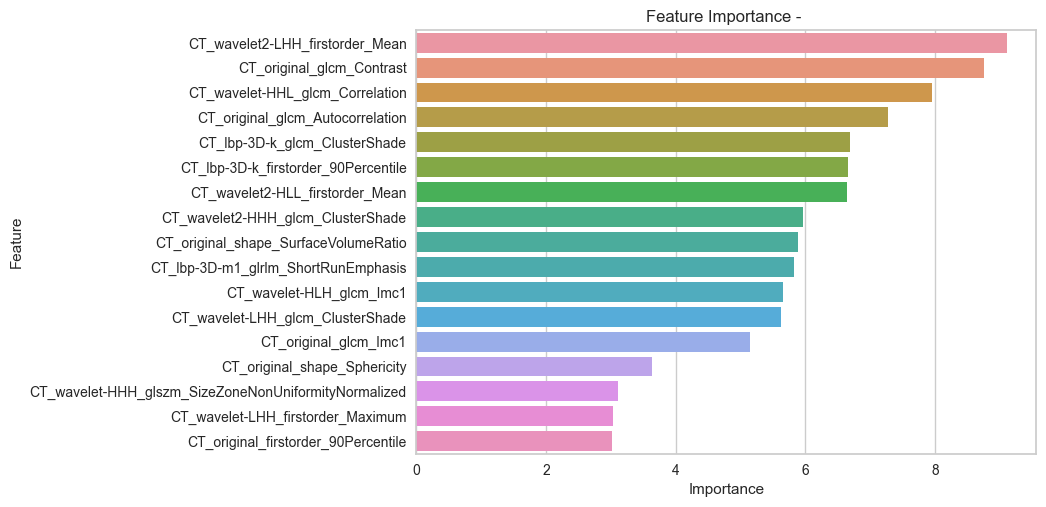

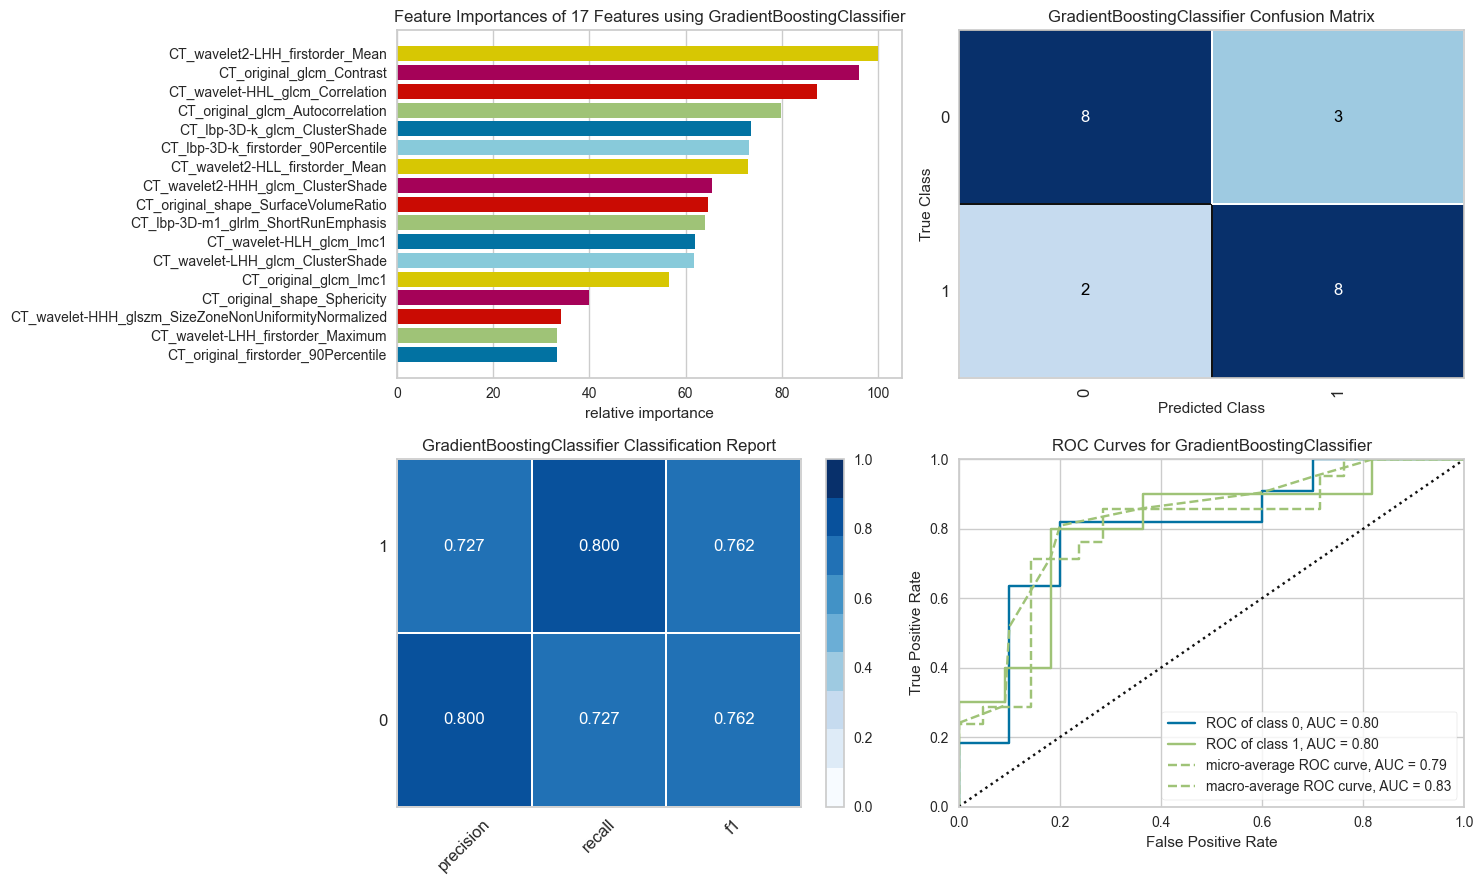

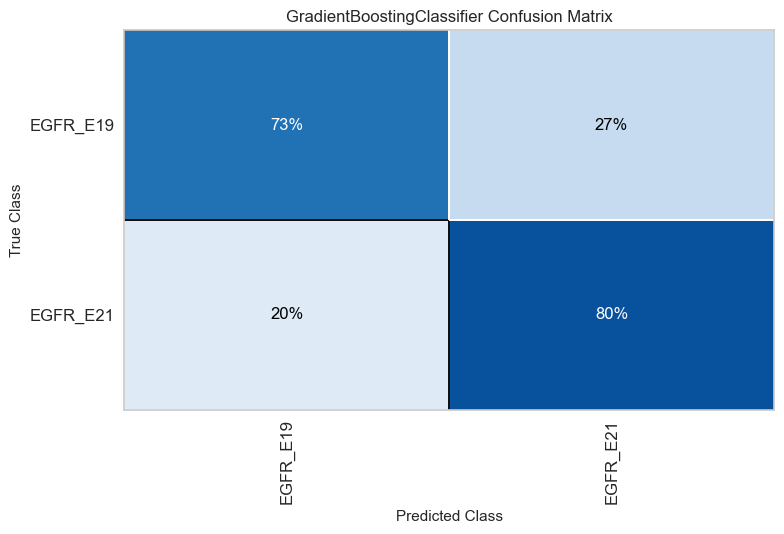

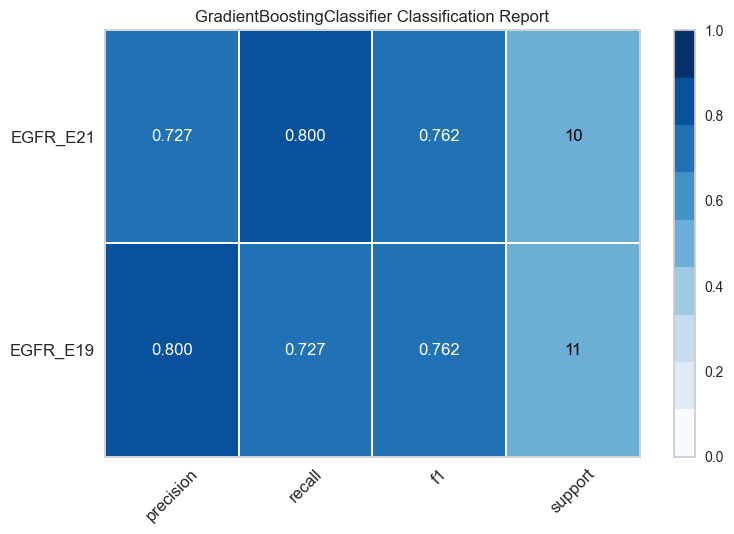

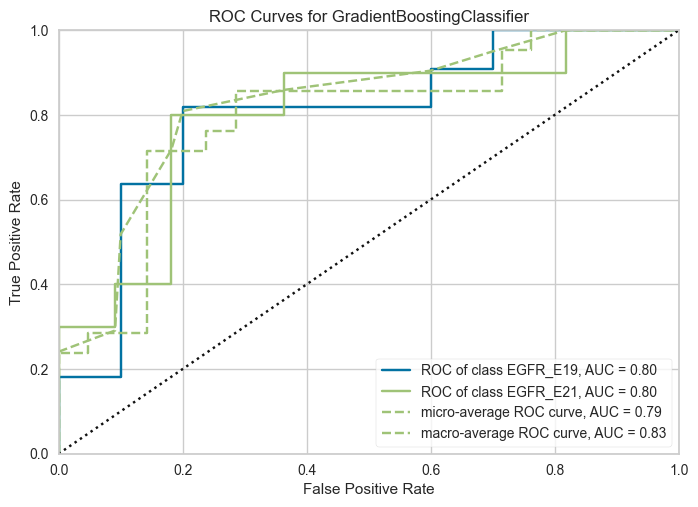

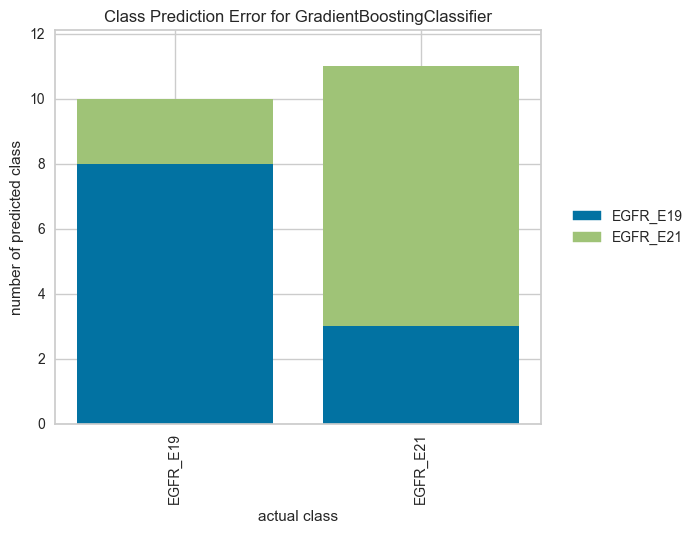

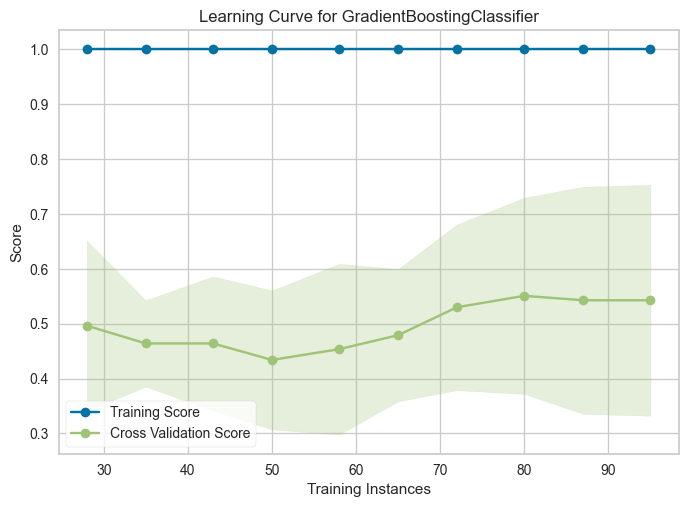

In [59]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [237]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [66]:
print(svm_model.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [67]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.6190476190476191 0.609090909090909


In [68]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-SVM73', Save_format = 'csv',Save_type = 'col')

In [69]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.60      0.82      0.69        11
    EGFR E21       0.67      0.40      0.50        10

    accuracy                           0.62        21
   macro avg       0.63      0.61      0.60        21
weighted avg       0.63      0.62      0.60        21

precision 0.6666666666666666 accuracy 0.6190476190476191 recall 0.4 auc 0.609090909090909


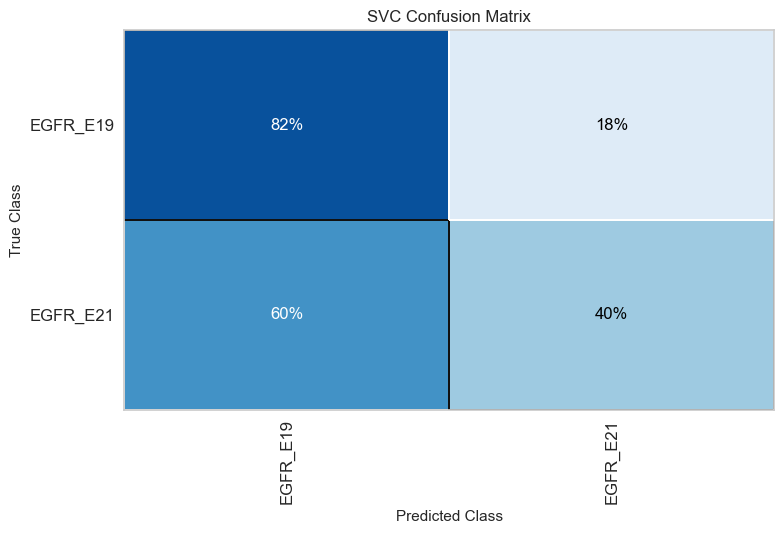

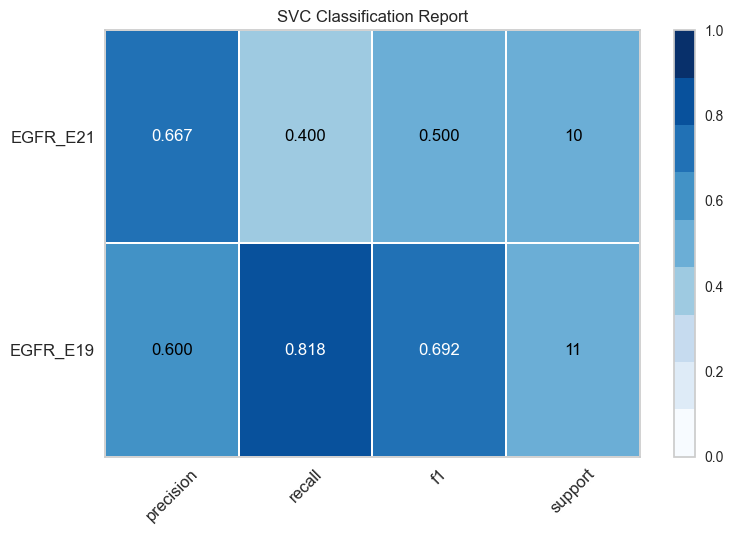

ModelError: no curves will be drawn; set binary=True.

In [70]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [73]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6666666666666666

In [74]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-XGB73', Save_format = 'csv',Save_type = 'col')

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.73      0.70        11
    EGFR E21       0.67      0.60      0.63        10

    accuracy                           0.67        21
   macro avg       0.67      0.66      0.66        21
weighted avg       0.67      0.67      0.67        21

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6 auc 0.6636363636363637


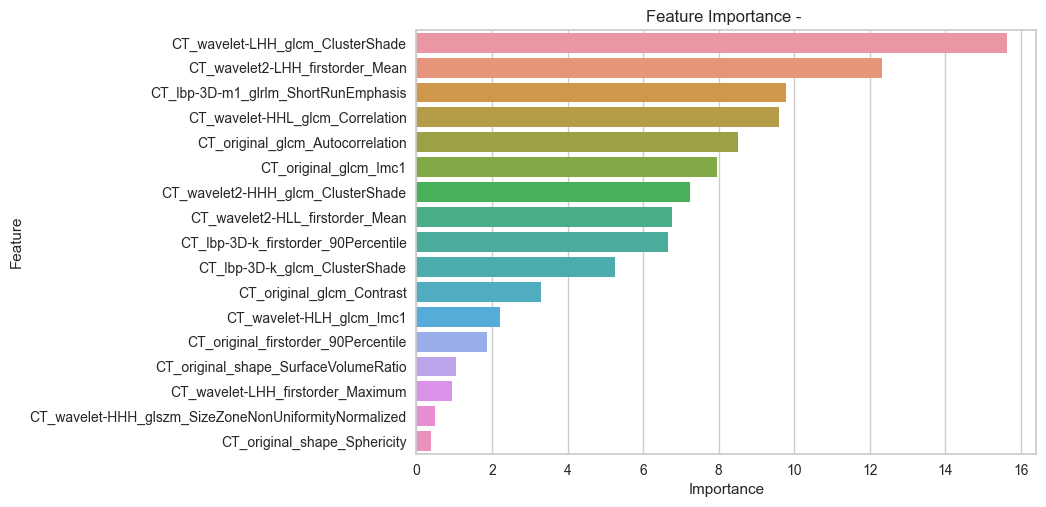

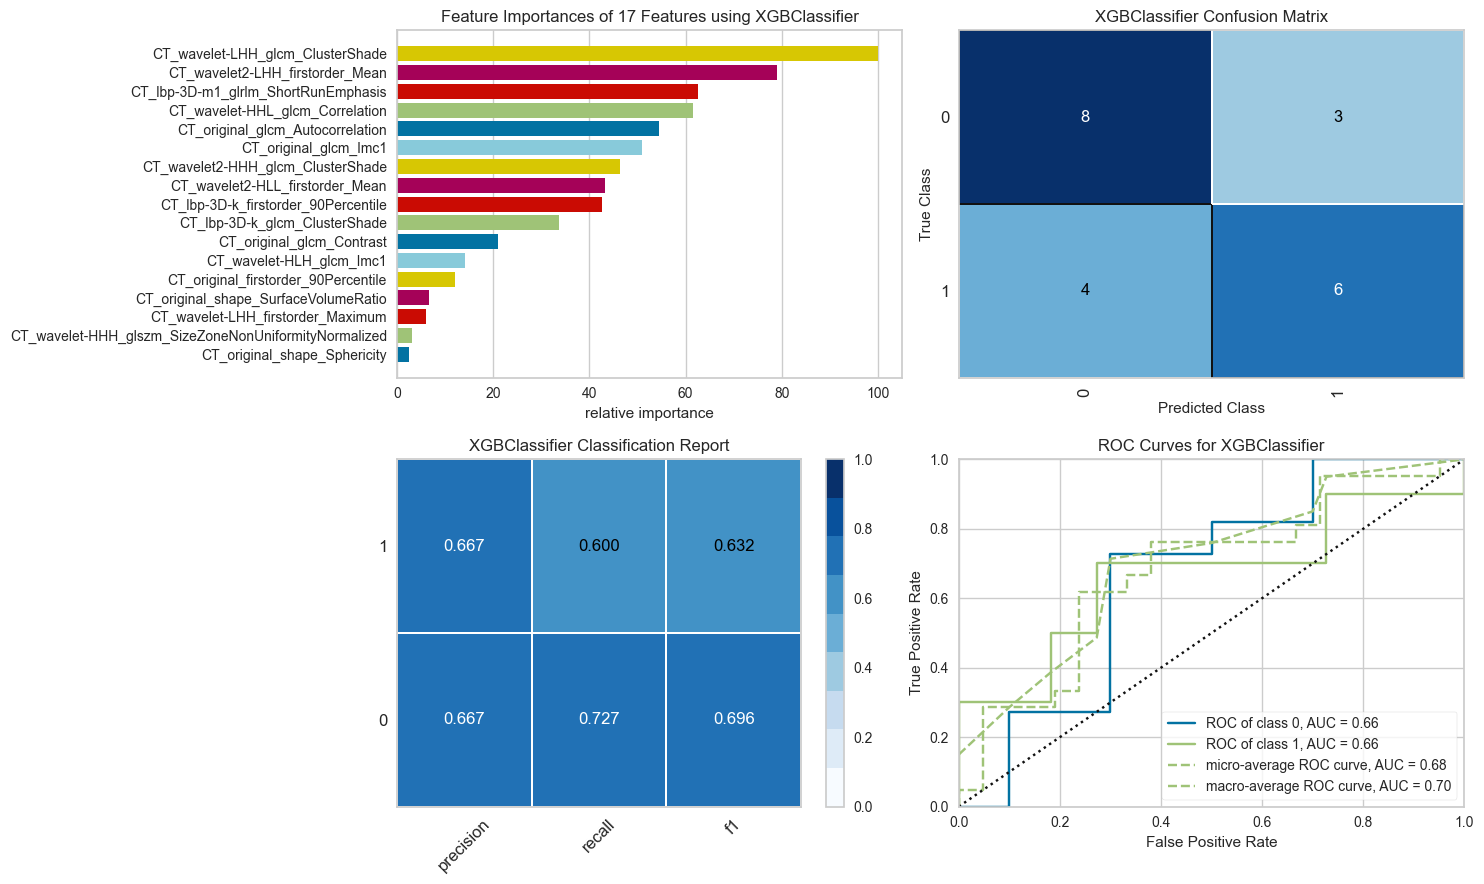

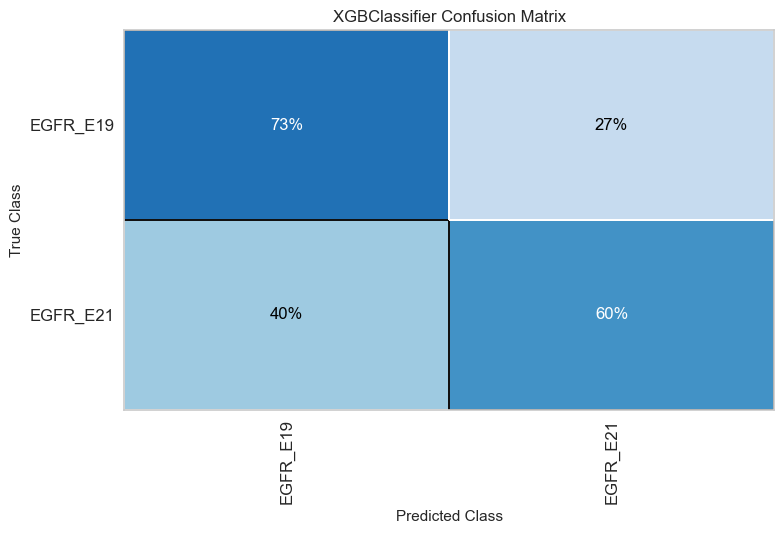

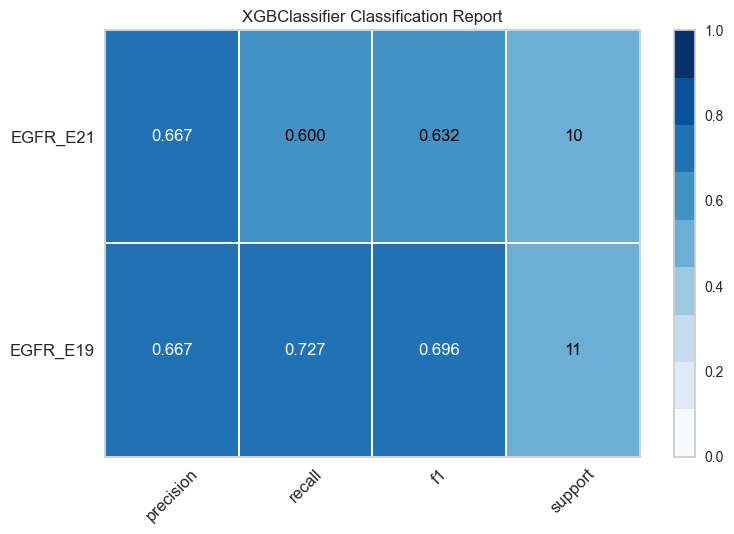

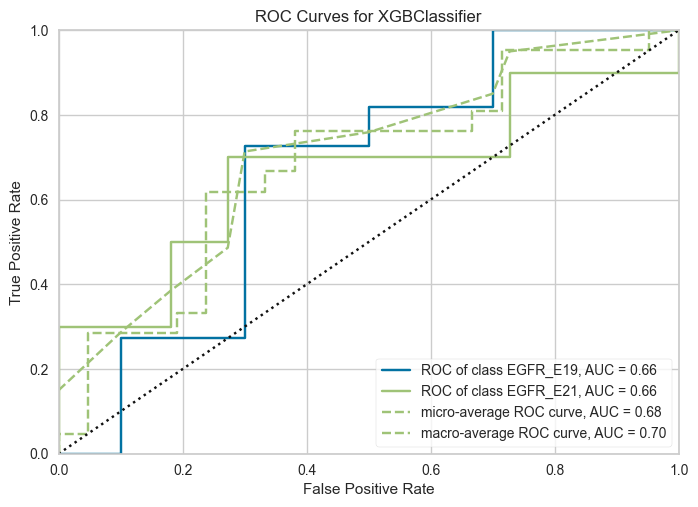

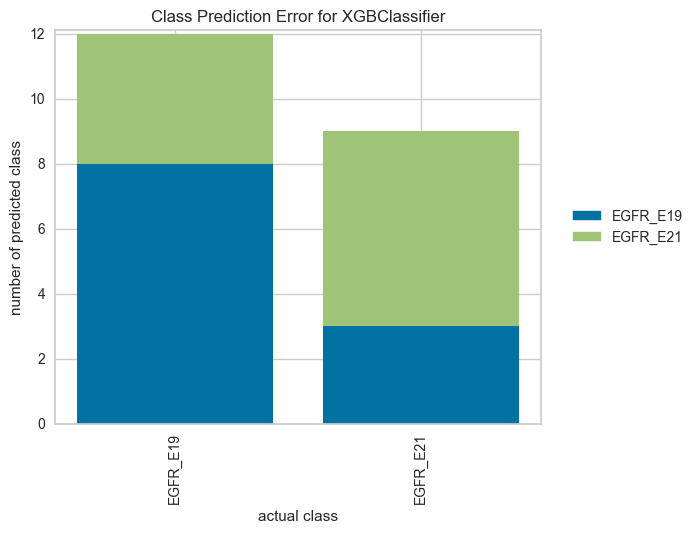

In [76]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [78]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6666666666666666

In [79]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-lgb73', Save_format = 'csv',Save_type = 'col')

In [80]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB17-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.55      0.63        11
    EGFR E21       0.62      0.80      0.70        10

    accuracy                           0.67        21
   macro avg       0.68      0.67      0.66        21
weighted avg       0.69      0.67      0.66        21

precision 0.6153846153846154 accuracy 0.6666666666666666 recall 0.8 auc 0.6727272727272727


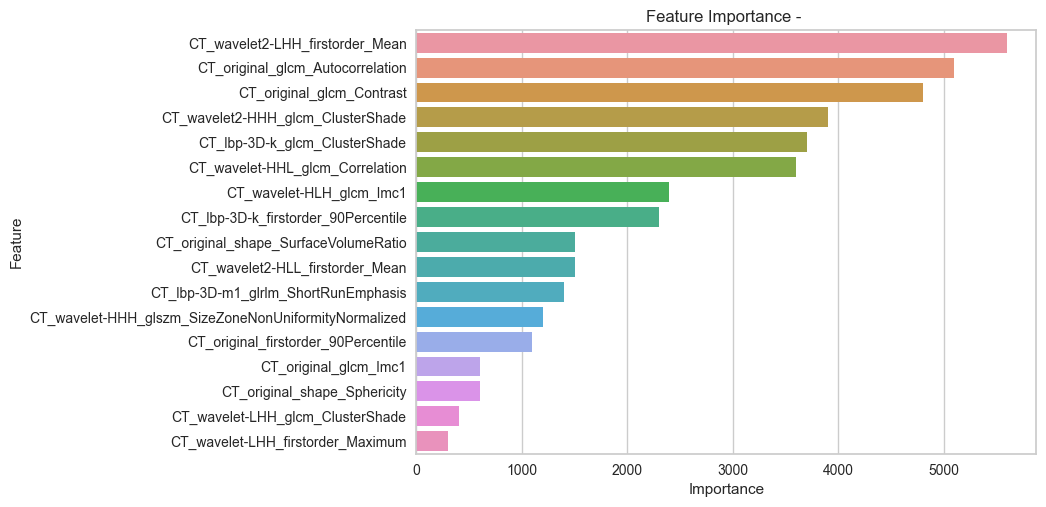

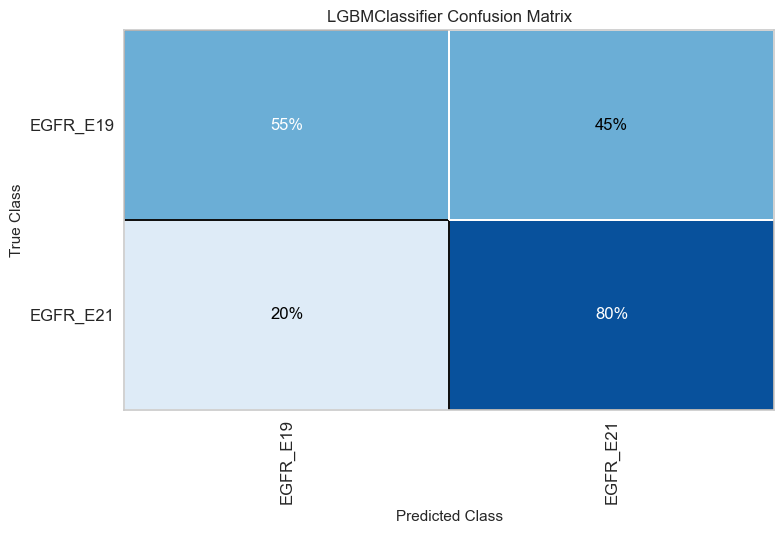

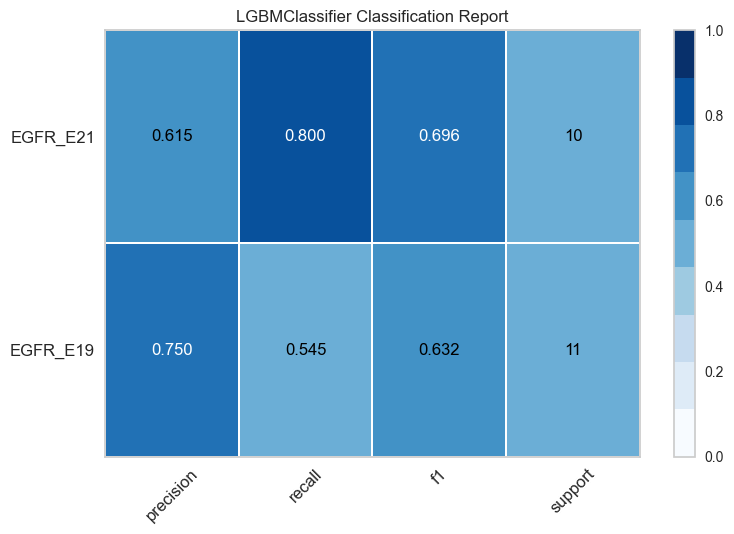

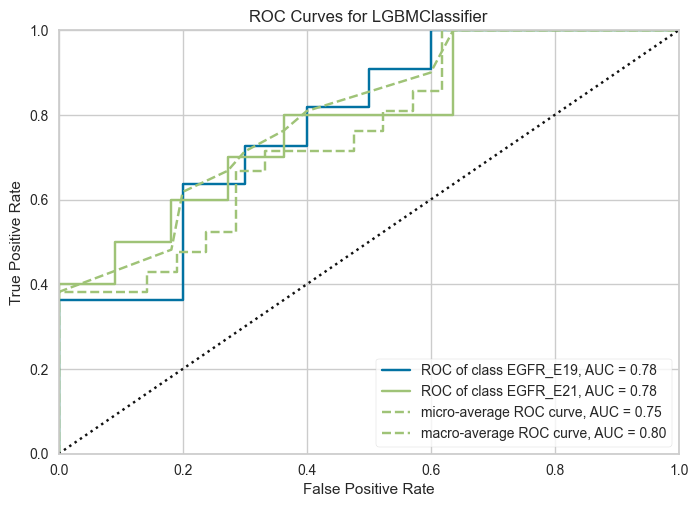

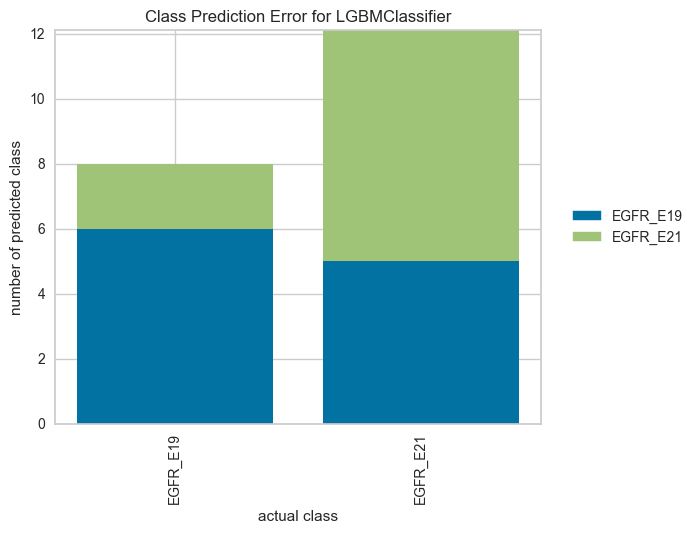

In [81]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.659091
RF: 0.859091
XGBoost: 0.663636
LightGBM: 0.672727
0:	learn: 0.6463980	total: 482us	remaining: 96ms
1:	learn: 0.6316570	total: 1.01ms	remaining: 100ms
2:	learn: 0.6195797	total: 1.42ms	remaining: 93.2ms
3:	learn: 0.5938128	total: 1.82ms	remaining: 89.3ms
4:	learn: 0.5770856	total: 2.24ms	remaining: 87.4ms
5:	learn: 0.5484246	total: 2.66ms	remaining: 85.9ms
6:	learn: 0.5336102	total: 3.07ms	remaining: 84.5ms
7:	learn: 0.5264653	total: 3.47ms	remaining: 83.4ms
8:	learn: 0.5032328	total: 3.9ms	remaining: 82.7ms
9:	learn: 0.4943926	total: 4.34ms	remaining: 82.4ms
10:	learn: 0.4692291	total: 4.72ms	remaining: 81.1ms
11:	learn: 0.4570745	total: 5.09ms	remaining: 79.8ms
12:	learn: 0.4462826	total: 5.47ms	remaining: 78.7ms
13:	learn: 0.4390931	total: 5.92ms	remaining: 78.7ms
14:	learn: 0.4242641	total: 6.33ms	remaining: 78.1ms
15:	learn: 0.4199689	total: 6.72ms	remaining: 77.3ms
16:	lear

GBDT: 0.763636
[iter 0] loss=0.0974 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 100] loss=0.0974 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0969 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.096

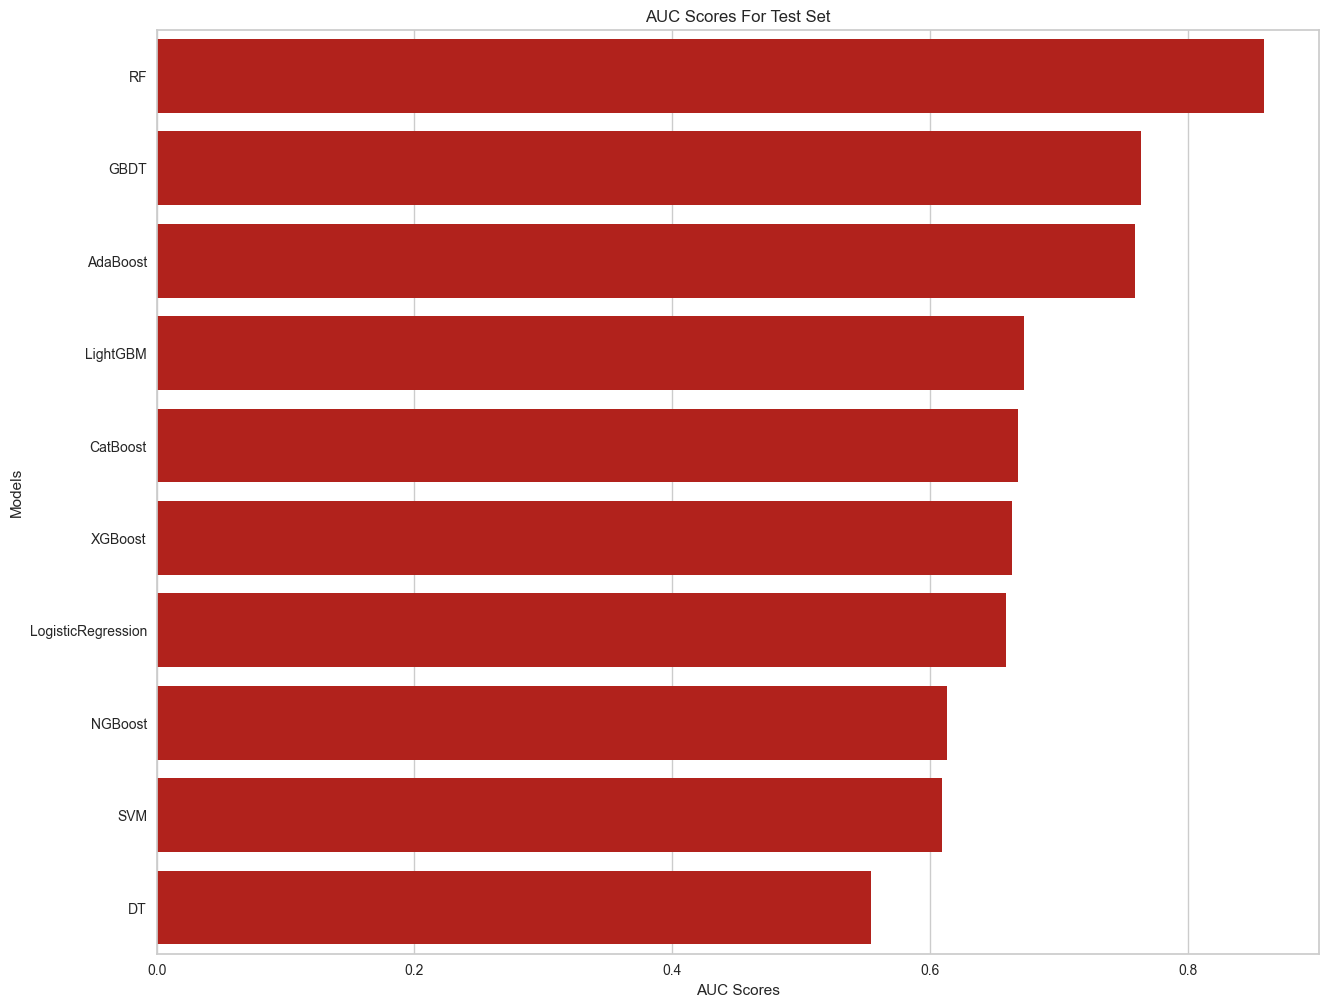

In [83]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
                ('NGBoost', ngb_tuned),
                ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

0:	learn: 0.6648874	total: 768us	remaining: 153ms
1:	learn: 0.6432825	total: 1.58ms	remaining: 156ms
2:	learn: 0.6214913	total: 2.25ms	remaining: 148ms
3:	learn: 0.6064415	total: 2.86ms	remaining: 140ms
4:	learn: 0.5720957	total: 3.51ms	remaining: 137ms
5:	learn: 0.5482251	total: 4.14ms	remaining: 134ms
6:	learn: 0.5251900	total: 4.74ms	remaining: 131ms
7:	learn: 0.4961681	total: 5.45ms	remaining: 131ms
8:	learn: 0.4855609	total: 6.08ms	remaining: 129ms
9:	learn: 0.4604455	total: 6.69ms	remaining: 127ms
10:	learn: 0.4401102	total: 7.33ms	remaining: 126ms
11:	learn: 0.4229375	total: 7.91ms	remaining: 124ms
12:	learn: 0.3978899	total: 8.51ms	remaining: 122ms
13:	learn: 0.3896063	total: 9.11ms	remaining: 121ms
14:	learn: 0.3680007	total: 9.71ms	remaining: 120ms
15:	learn: 0.3519629	total: 10.3ms	remaining: 119ms
16:	learn: 0.3433342	total: 10.9ms	remaining: 118ms
17:	learn: 0.3318775	total: 11.6ms	remaining: 117ms
18:	learn: 0.3185570	total: 12.2ms	remaining: 116ms
19:	learn: 0.3088076	to

25:	learn: 0.2536915	total: 15.9ms	remaining: 107ms
26:	learn: 0.2482515	total: 16.6ms	remaining: 106ms
27:	learn: 0.2398049	total: 17.2ms	remaining: 106ms
28:	learn: 0.2354767	total: 17.8ms	remaining: 105ms
29:	learn: 0.2247182	total: 18.4ms	remaining: 105ms
30:	learn: 0.2165197	total: 19ms	remaining: 104ms
31:	learn: 0.2123411	total: 19.7ms	remaining: 104ms
32:	learn: 0.2074341	total: 20.4ms	remaining: 103ms
33:	learn: 0.2010419	total: 20.9ms	remaining: 102ms
34:	learn: 0.1941561	total: 21.5ms	remaining: 101ms
35:	learn: 0.1919016	total: 22.1ms	remaining: 101ms
36:	learn: 0.1868208	total: 22.7ms	remaining: 99.8ms
37:	learn: 0.1808838	total: 23.3ms	remaining: 99.2ms
38:	learn: 0.1738232	total: 23.9ms	remaining: 98.7ms
39:	learn: 0.1677435	total: 24.5ms	remaining: 98ms
40:	learn: 0.1649587	total: 25.1ms	remaining: 97.4ms
41:	learn: 0.1608223	total: 25.7ms	remaining: 96.8ms
42:	learn: 0.1554067	total: 26.3ms	remaining: 96.1ms
43:	learn: 0.1511280	total: 26.9ms	remaining: 95.3ms
44:	lear

[iter 0] loss=0.6843 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0674 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0636 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0636 val_loss=0.00

[iter 0] loss=0.6836 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1015 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1015 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1015 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1015 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1012 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1008 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1008 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1008 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1008 val_loss=0.00

15:	learn: 0.2955177	total: 9.87ms	remaining: 114ms
16:	learn: 0.2874230	total: 10.5ms	remaining: 113ms
17:	learn: 0.2781678	total: 11.2ms	remaining: 113ms
18:	learn: 0.2686054	total: 11.8ms	remaining: 113ms
19:	learn: 0.2592765	total: 12.4ms	remaining: 112ms
20:	learn: 0.2498091	total: 13ms	remaining: 111ms
21:	learn: 0.2391386	total: 13.7ms	remaining: 111ms
22:	learn: 0.2312419	total: 14.2ms	remaining: 110ms
23:	learn: 0.2227490	total: 14.9ms	remaining: 109ms
24:	learn: 0.2132494	total: 15.5ms	remaining: 108ms
25:	learn: 0.2079946	total: 16.1ms	remaining: 108ms
26:	learn: 0.2057561	total: 16.7ms	remaining: 107ms
27:	learn: 0.1966157	total: 17.3ms	remaining: 106ms
28:	learn: 0.1920572	total: 17.9ms	remaining: 106ms
29:	learn: 0.1819629	total: 18.5ms	remaining: 105ms
30:	learn: 0.1718247	total: 19.1ms	remaining: 104ms
31:	learn: 0.1655794	total: 19.7ms	remaining: 103ms
32:	learn: 0.1585312	total: 20.3ms	remaining: 103ms
33:	learn: 0.1546963	total: 20.9ms	remaining: 102ms
34:	learn: 0.1

[iter 0] loss=0.6843 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0507 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0507 val_loss=0.00

[iter 0] loss=0.6836 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1054 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1054 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1054 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.1048 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.1048 val_loss=0.00

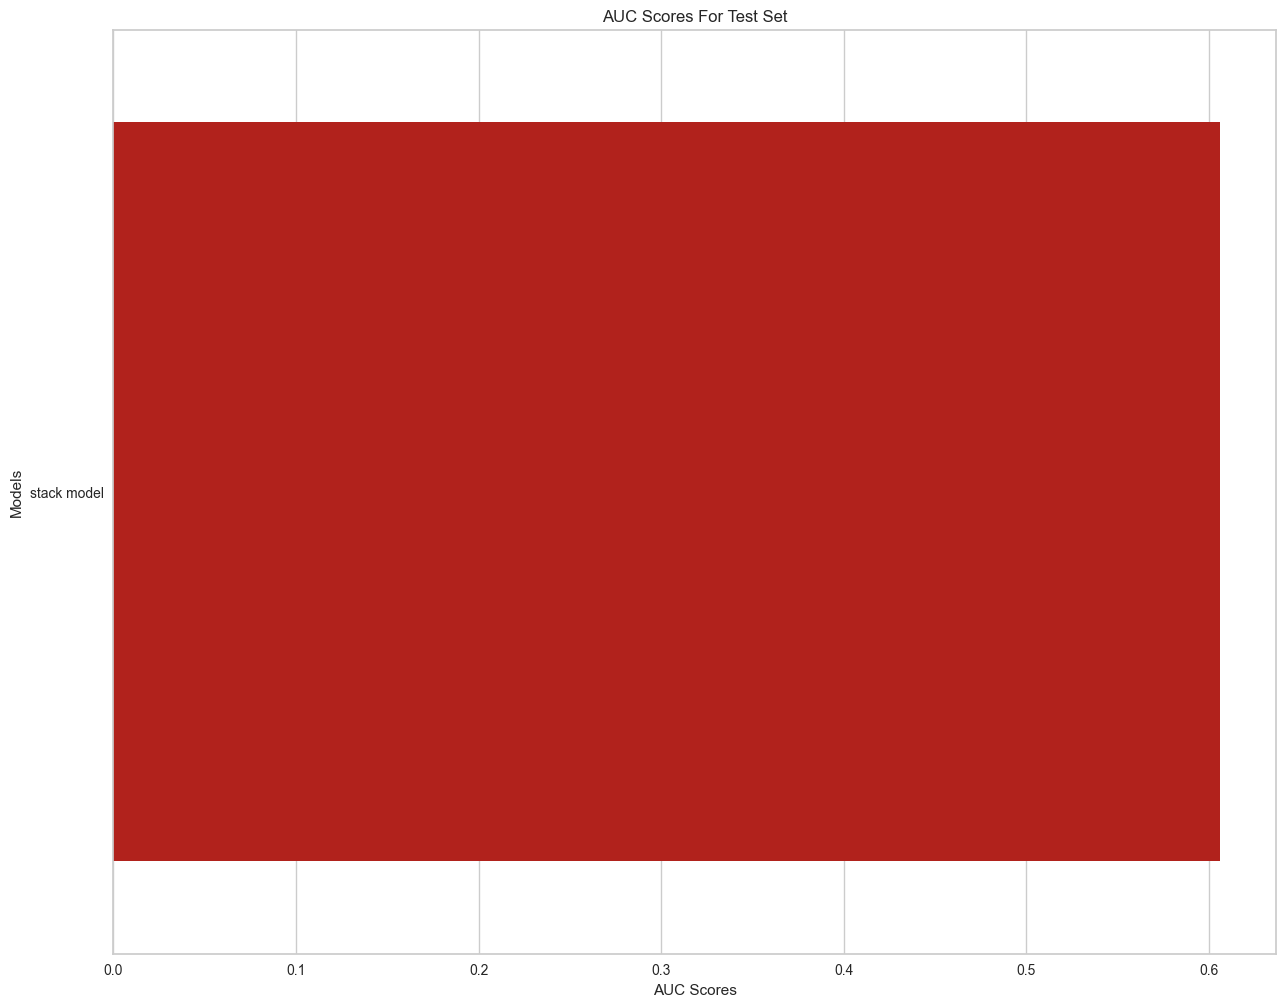

In [105]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=lgbm_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


In [106]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [108]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

0.6633204633204633

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB17-stack73', Save_format = 'csv',Save_type = 'col')

In [84]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2/RFE-RF-GB/NB171")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-NB17.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [87]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"

In [88]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.50      0.47      0.48        17
    EGFR_E21       0.31      0.33      0.32        12

    accuracy                           0.41        29
   macro avg       0.40      0.40      0.40        29
weighted avg       0.42      0.41      0.42        29

precision 0.3076923076923077 accuracy 0.41379310344827586 recall 0.3333333333333333 auc 0.4019607843137255


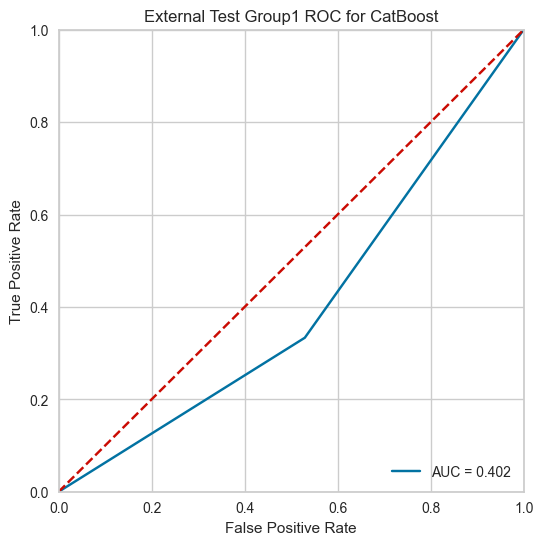

In [89]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [90]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8 9]
 [8 4]]
Normalized confusion matrix
[[0.47 0.53]
 [0.67 0.33]]


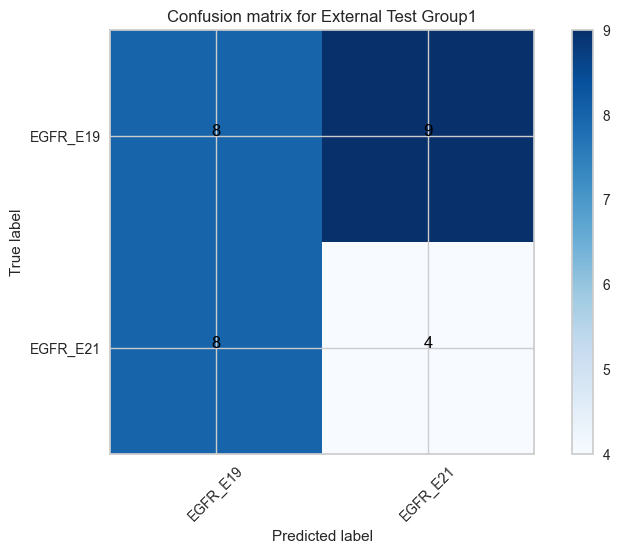

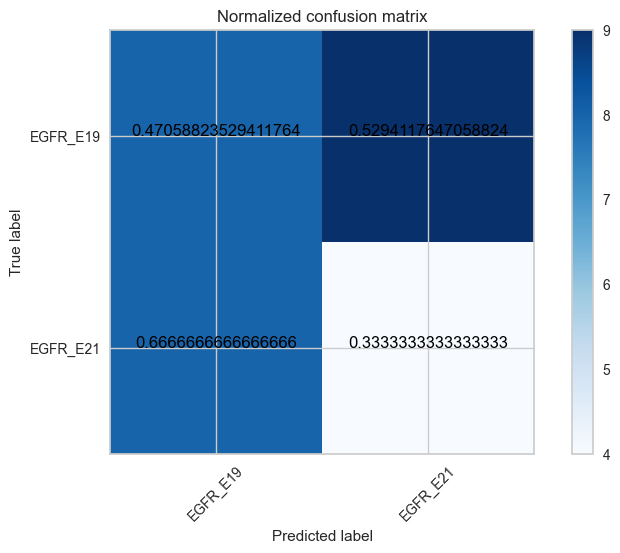

In [91]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [92]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.72      0.76      0.74        17
    EGFR_E21       0.64      0.58      0.61        12

    accuracy                           0.69        29
   macro avg       0.68      0.67      0.68        29
weighted avg       0.69      0.69      0.69        29

precision 0.6363636363636364 accuracy 0.6896551724137931 recall 0.5833333333333334 auc 0.6740196078431373


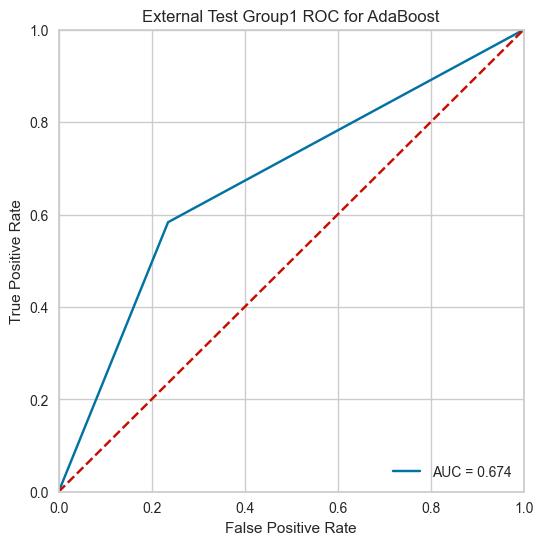

In [93]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [94]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  4]
 [ 5  7]]
Normalized confusion matrix
[[0.76 0.24]
 [0.42 0.58]]


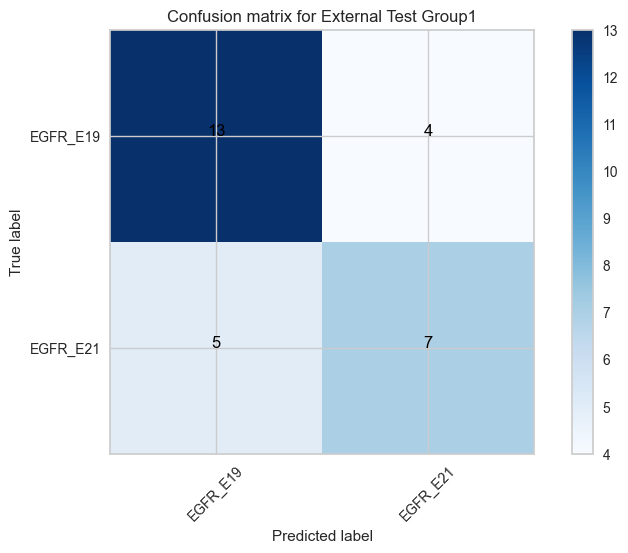

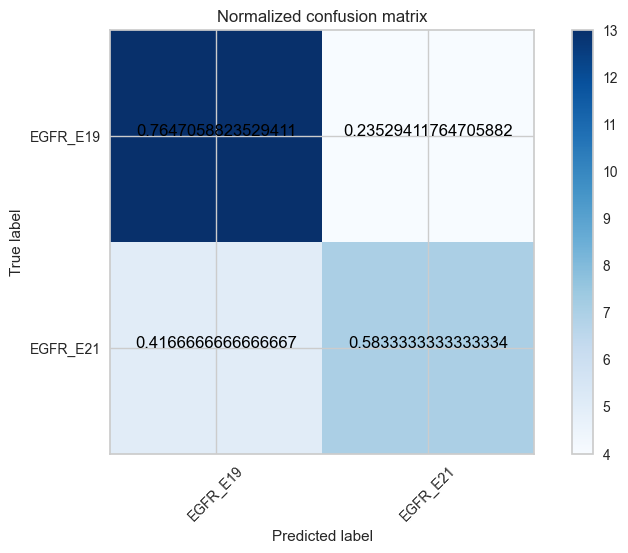

In [95]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [96]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR_E19       0.67      0.35      0.46        17
    EGFR_E21       0.45      0.75      0.56        12

    accuracy                           0.52        29
   macro avg       0.56      0.55      0.51        29
weighted avg       0.58      0.52      0.50        29

precision 0.5583333333333333 accuracy 0.5172413793103449 recall 0.5514705882352942 auc 0.5514705882352942


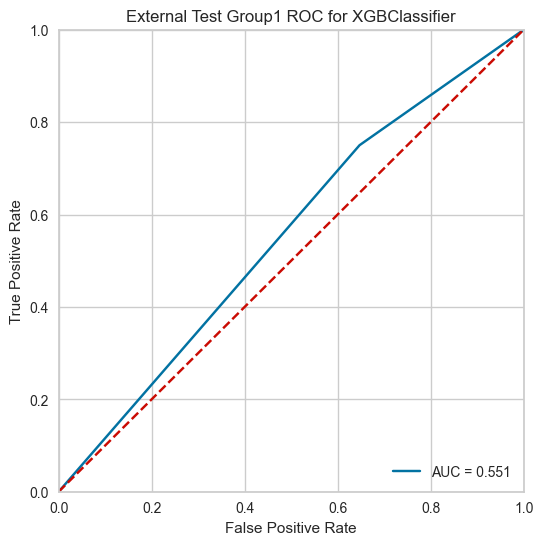

In [97]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [98]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6 11]
 [ 3  9]]
Normalized confusion matrix
[[0.35 0.65]
 [0.25 0.75]]


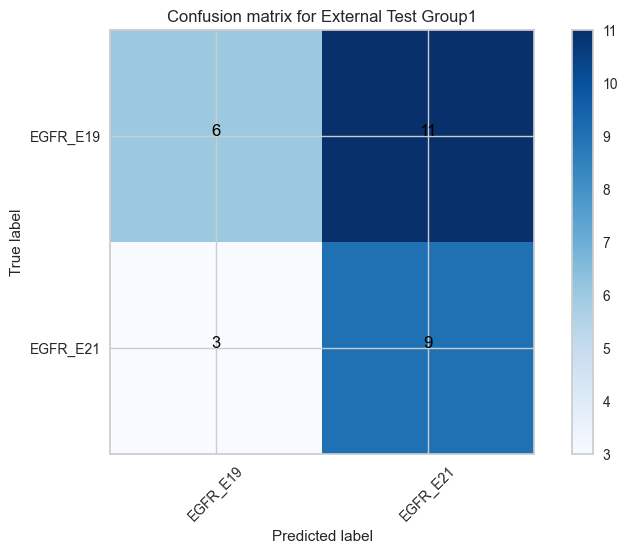

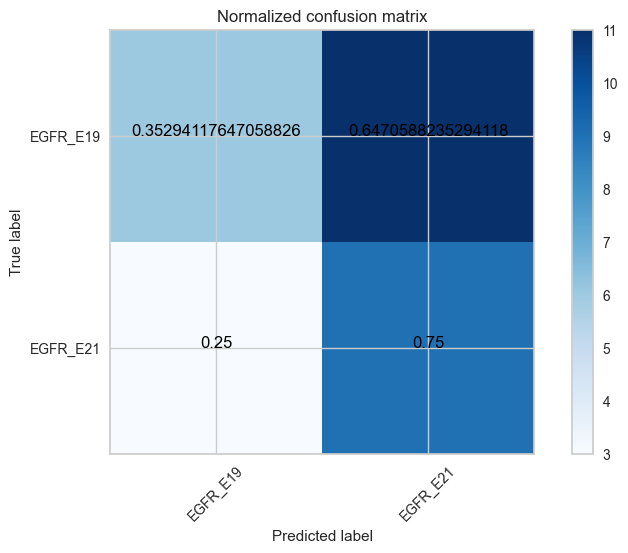

In [99]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.62      0.47      0.53        17
    EGFR_E21       0.44      0.58      0.50        12

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.52        29
weighted avg       0.54      0.52      0.52        29

precision 0.4375 accuracy 0.5172413793103449 recall 0.5833333333333334 auc 0.5269607843137255


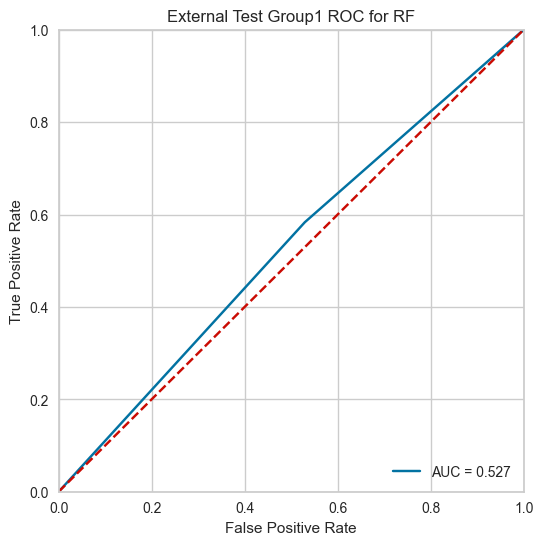

In [101]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[8 9]
 [5 7]]
Normalized confusion matrix
[[0.47 0.53]
 [0.42 0.58]]


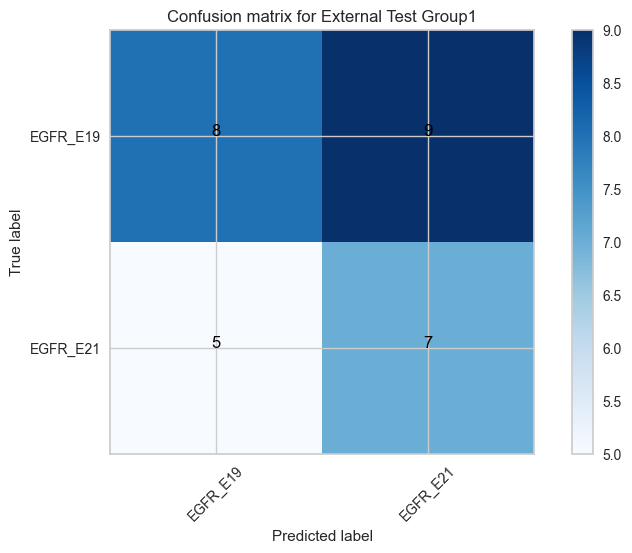

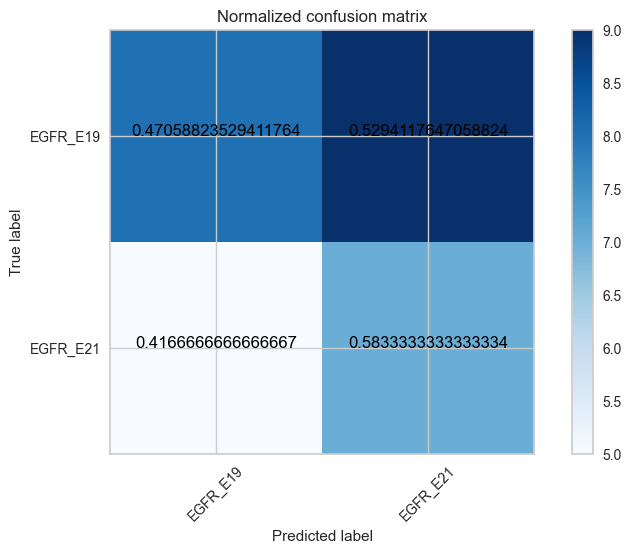

In [102]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [103]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.55      0.71      0.62        17
    EGFR_E21       0.29      0.17      0.21        12

    accuracy                           0.48        29
   macro avg       0.42      0.44      0.41        29
weighted avg       0.44      0.48      0.45        29

precision 0.2857142857142857 accuracy 0.4827586206896552 recall 0.16666666666666666 auc 0.4362745098039216


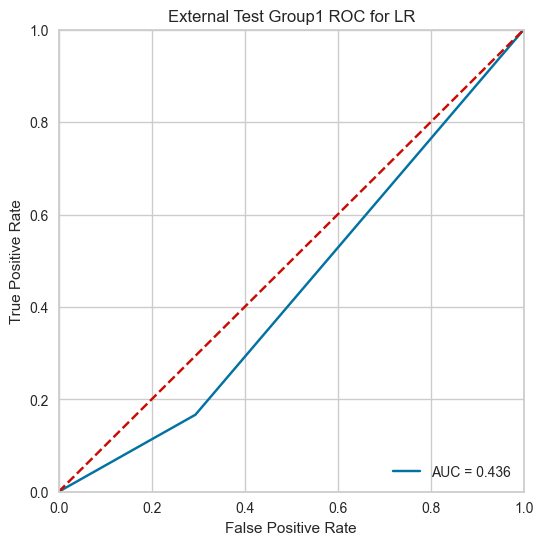

In [104]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[12  5]
 [10  2]]
Normalized confusion matrix
[[0.71 0.29]
 [0.83 0.17]]


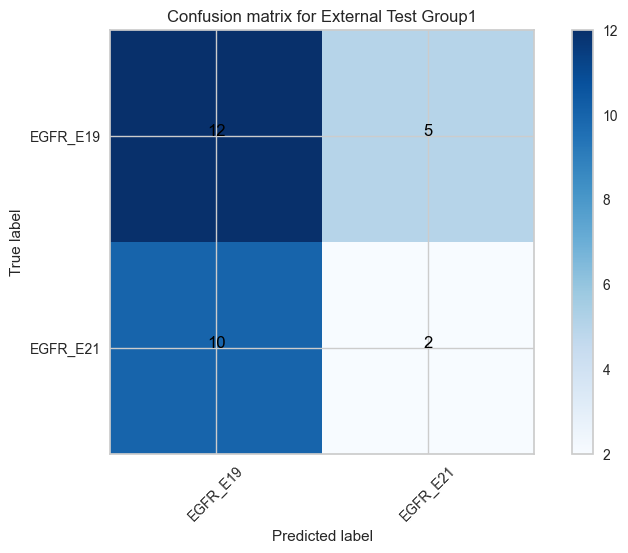

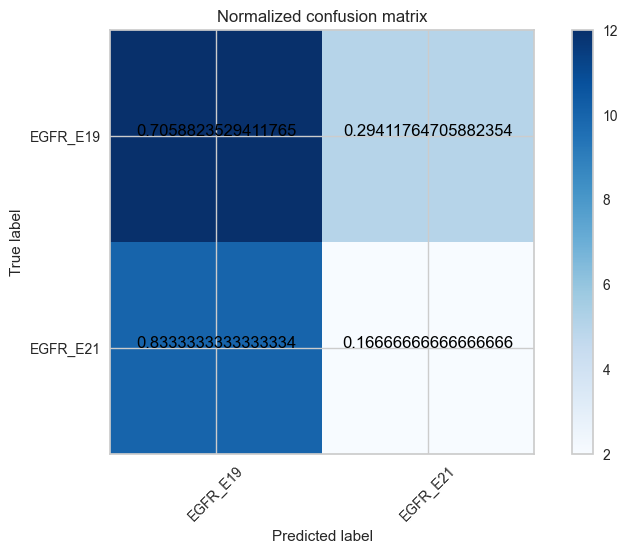

In [105]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [106]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.67      0.94      0.78        17
    EGFR_E21       0.80      0.33      0.47        12

    accuracy                           0.69        29
   macro avg       0.73      0.64      0.63        29
weighted avg       0.72      0.69      0.65        29

precision 0.8 accuracy 0.6896551724137931 recall 0.3333333333333333 auc 0.6372549019607843


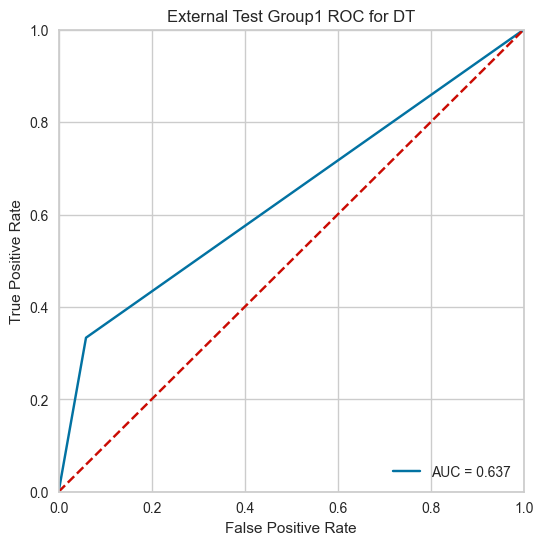

In [107]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[16  1]
 [ 8  4]]
Normalized confusion matrix
[[0.94 0.06]
 [0.67 0.33]]


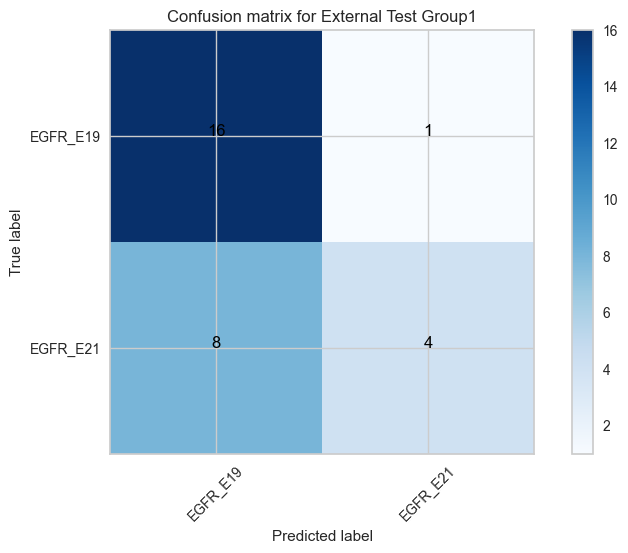

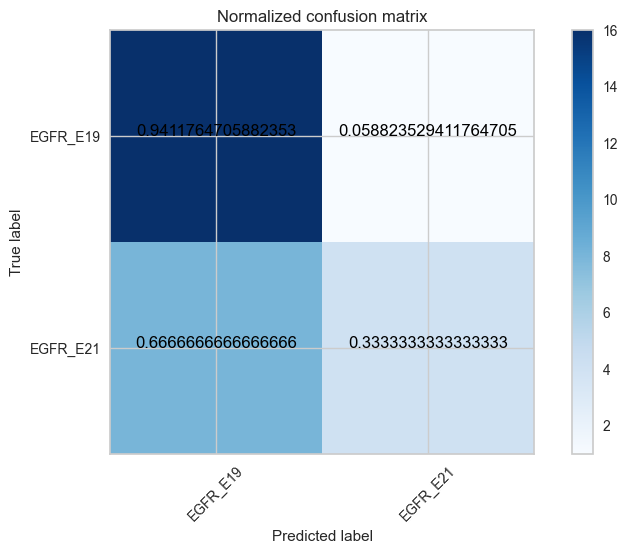

In [108]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [109]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.62      0.47      0.53        17
    EGFR_E21       0.44      0.58      0.50        12

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.52        29
weighted avg       0.54      0.52      0.52        29

precision 0.4375 accuracy 0.5172413793103449 recall 0.5833333333333334 auc 0.5269607843137255


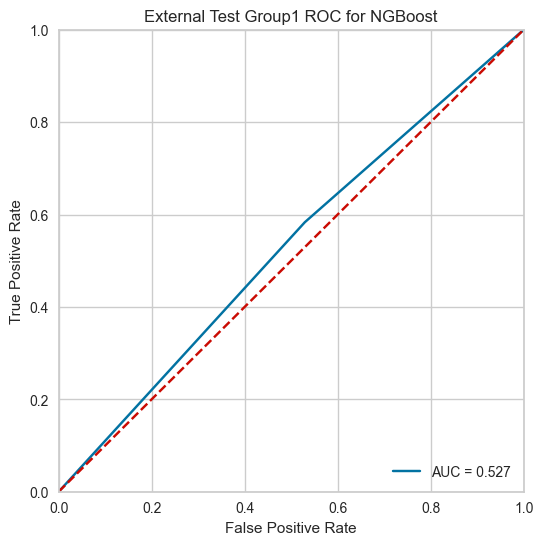

In [110]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[8 9]
 [5 7]]
Normalized confusion matrix
[[0.47 0.53]
 [0.42 0.58]]


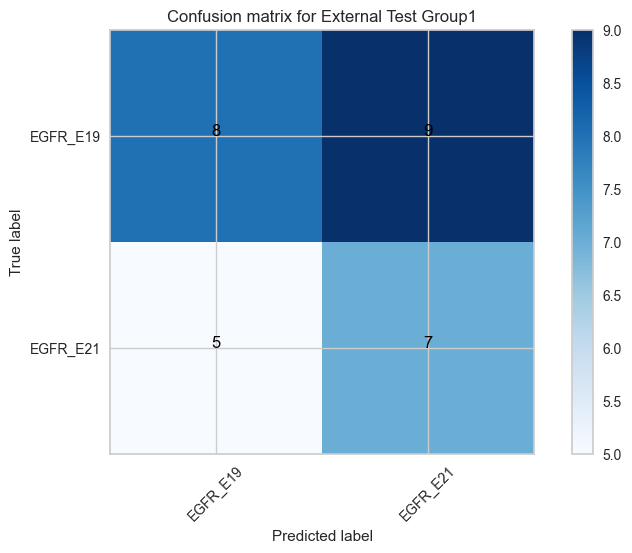

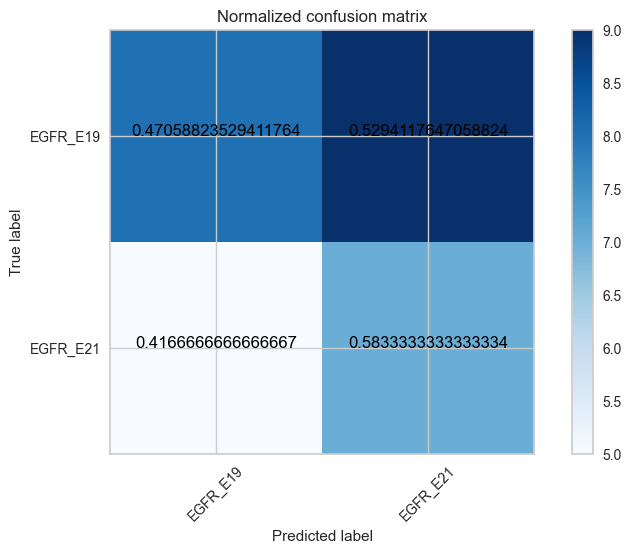

In [111]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [112]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.62      0.47      0.53        17
    EGFR_E21       0.44      0.58      0.50        12

    accuracy                           0.52        29
   macro avg       0.53      0.53      0.52        29
weighted avg       0.54      0.52      0.52        29

precision 0.4375 accuracy 0.5172413793103449 recall 0.5833333333333334 auc 0.5269607843137255


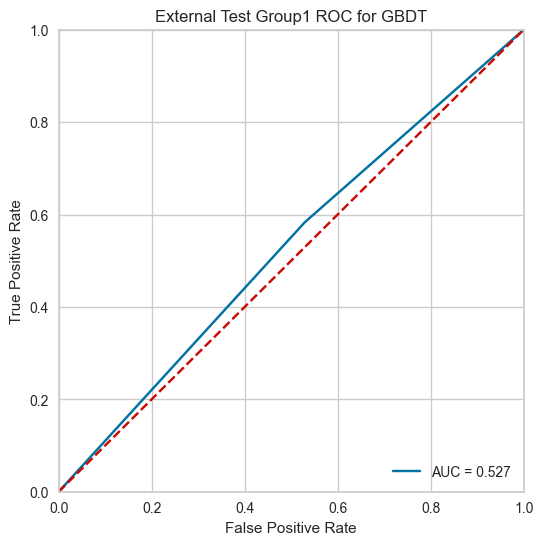

In [113]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[8 9]
 [5 7]]
Normalized confusion matrix
[[0.47 0.53]
 [0.42 0.58]]


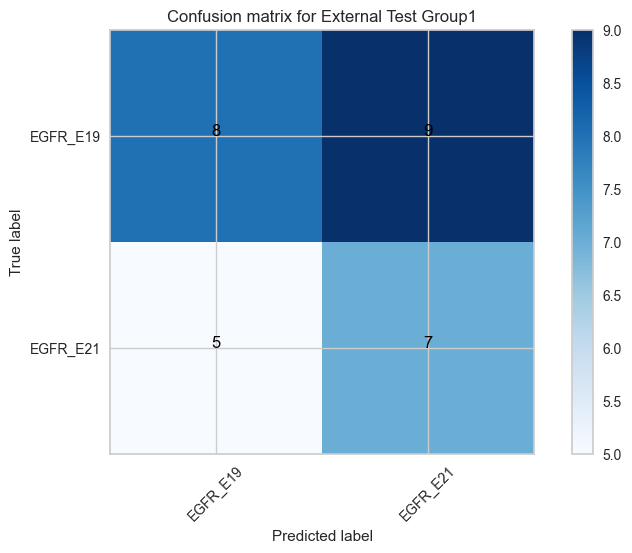

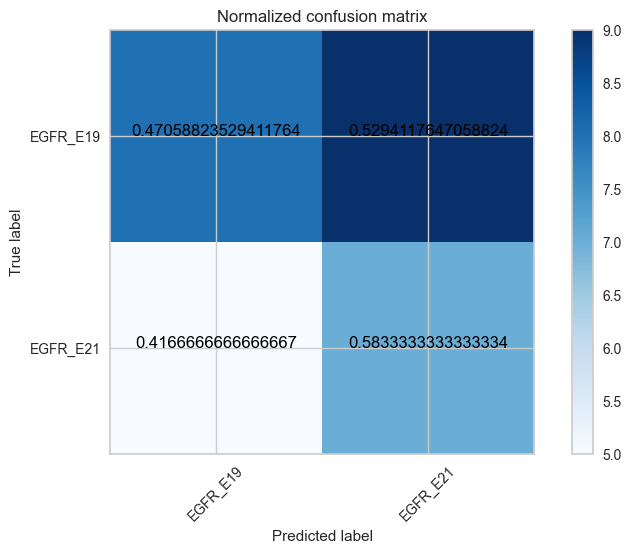

In [114]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [115]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.57      0.76      0.65        17
    EGFR_E21       0.33      0.17      0.22        12

    accuracy                           0.52        29
   macro avg       0.45      0.47      0.44        29
weighted avg       0.47      0.52      0.47        29

precision 0.3333333333333333 accuracy 0.5172413793103449 recall 0.16666666666666666 auc 0.5269607843137255


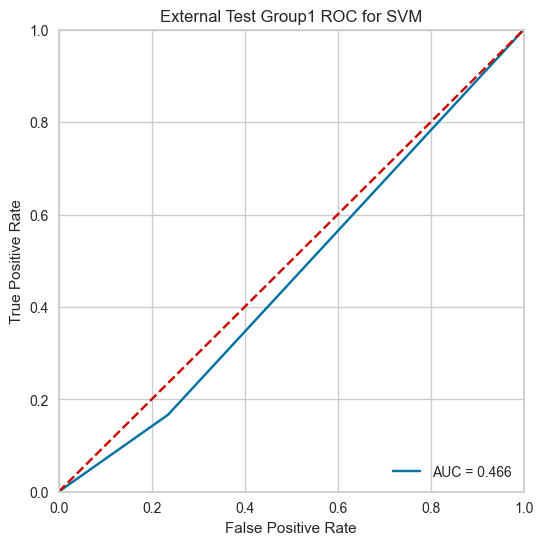

In [116]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[13  4]
 [10  2]]
Normalized confusion matrix
[[0.76 0.24]
 [0.83 0.17]]


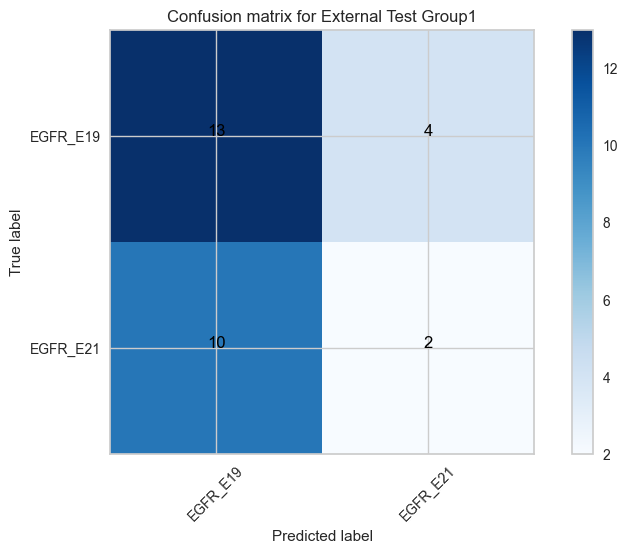

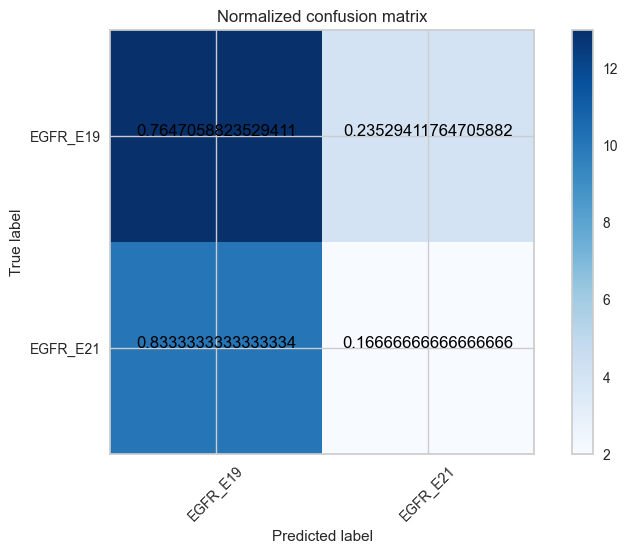

In [117]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [118]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB171/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-NB171-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.56      0.53      0.55        17
    EGFR_E21       0.38      0.42      0.40        12

    accuracy                           0.48        29
   macro avg       0.47      0.47      0.47        29
weighted avg       0.49      0.48      0.49        29

precision 0.38461538461538464 accuracy 0.4827586206896552 recall 0.4166666666666667 auc 0.4730392156862745


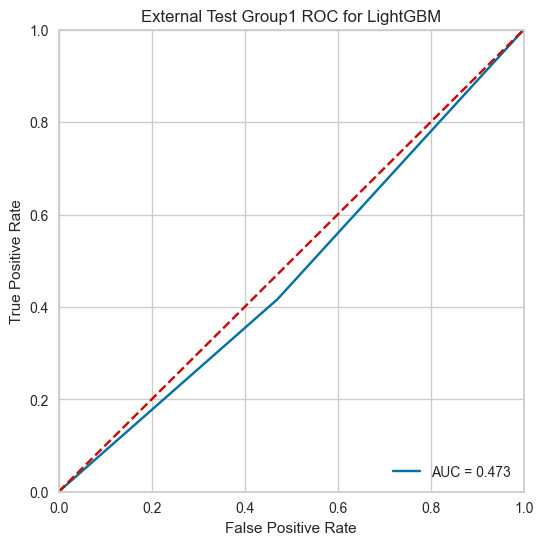

In [119]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[9 8]
 [7 5]]
Normalized confusion matrix
[[0.53 0.47]
 [0.58 0.42]]


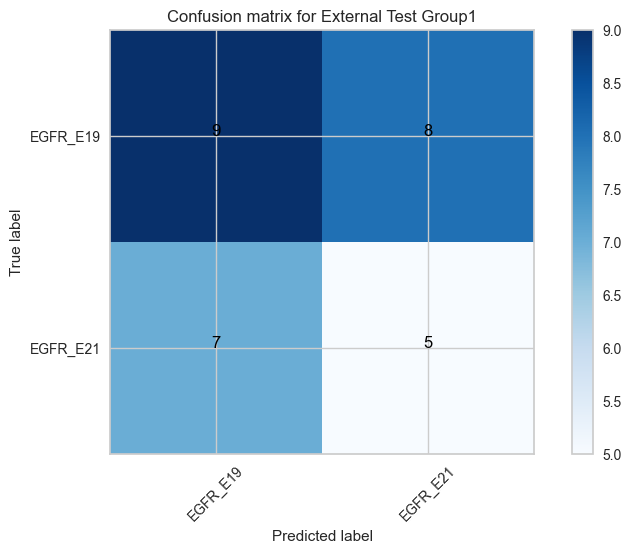

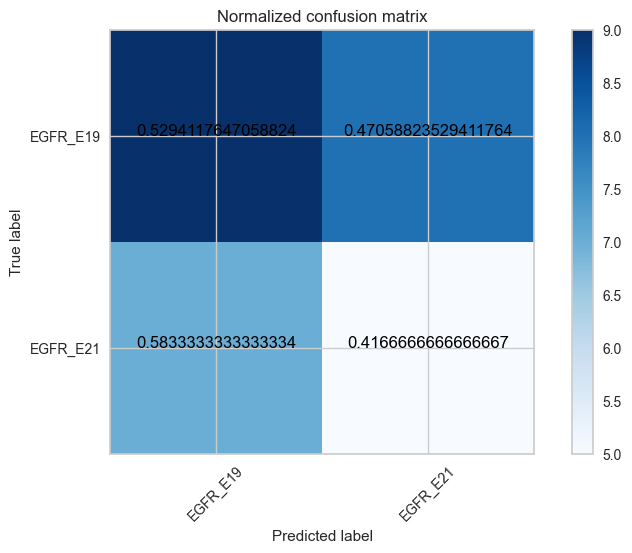

In [121]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()